In [1]:
import pandas as pd #data manipulation
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
df = pd.read_csv('1201.csv')
df

,EventTime,MessageCode,EventId,IngestTime,sourceIp,httpMethod,httpUrl,Organization,app,user,timestamp_req,timestamp_resp
0,2022-12-01 00:00:02,"{""MessageCode"":""DDV1_HTTP""","""EventId"":""1C2L0954HE9891SWDMIIQQDCYZ""","""IngestTime"":""2022-12-01T00:00:02.5212922Z""","\""sourceIp\"": \""62.48.164.172\""","\""httpMethod\"": \""GET\""","\""httpUrl\"": \""https://api.docdigitizer.com/a...","\""organization\"": \""6b1faf26-cb89-4cc0-a158-d...","\""app\"": \""6b1faf26-cb89-4cc0-a158-d494e1c664...","\""user\"": null","\""timestamp_req\"": \""2022-11-30 23:59:22.3595...","\""timestamp_resp\"": \""2022-11-30 23:59:22.446..."
1,2022-12-01 00:00:02,"{""MessageCode"":""DDV1_HTTP""","""EventId"":""1IRV3A9VU0EAH1N2JQ9IM9W1W7""","""IngestTime"":""2022-12-01T00:00:02.5212948Z""","\""sourceIp\"": \""62.48.164.172\""","\""httpMethod\"": \""GET\""","\""httpUrl\"": \""https://api.docdigitizer.com/a...","\""organization\"": \""6b1faf26-cb89-4cc0-a158-d...","\""app\"": \""6b1faf26-cb89-4cc0-a158-d494e1c664...","\""user\"": null","\""timestamp_req\"": \""2022-11-30 23:59:23.0631...","\""timestamp_resp\"": \""2022-11-30 23:59:23.166..."
2,2022-12-01 00:00:02,"{""MessageCode"":""DDV1_HTTP""","""EventId"":""GJHS6KQXKDWTLV5H50VU3CM""","""IngestTime"":""2022-12-01T00:00:02.5212951Z""","\""sourceIp\"": \""193.36.190.25\""","\""httpMethod\"": \""GET\""","\""httpUrl\"": \""https://api.docdigitizer.com/a...","\""organization\"": \""09340114-ae3e-452e-9c7a-1...","\""app\"": \""09340114-ae3e-452e-9c7a-191f52d34d...","\""user\"": null","\""timestamp_req\"": \""2022-11-30 23:59:24.3843...","\""timestamp_resp\"": \""2022-11-30 23:59:24.484..."
3,2022-12-01 00:00:02,"{""MessageCode"":""DDV1_HTTP""","""EventId"":""1WGIVUU4P65I81K049SSGVUB7""","""IngestTime"":""2022-12-01T00:00:02.5212953Z""","\""sourceIp\"": \""62.48.164.172\""","\""httpMethod\"": \""GET\""","\""httpUrl\"": \""https://api.docdigitizer.com/a...","\""organization\"": \""6b1faf26-cb89-4cc0-a158-d...","\""app\"": \""6b1faf26-cb89-4cc0-a158-d494e1c664...","\""user\"": null","\""timestamp_req\"": \""2022-11-30 23:59:24.9367...","\""timestamp_resp\"": \""2022-11-30 23:59:25.030..."
4,2022-12-01 00:00:02,"{""MessageCode"":""DDV1_HTTP""","""EventId"":""WPL2LQGIU51Z13CK9XDVMBKPR""","""IngestTime"":""2022-12-01T00:00:02.5212956Z""","\""sourceIp\"": \""62.48.164.172\""","\""httpMethod\"": \""GET\""","\""httpUrl\"": \""https://api.docdigitizer.com/a...","\""organization\"": \""6b1faf26-cb89-4cc0-a158-d...","\""app\"": \""6b1faf26-cb89-4cc0-a158-d494e1c664...","\""user\"": null","\""timestamp_req\"": \""2022-11-30 23:59:25.0771...","\""timestamp_resp\"": \""2022-11-30 23:59:25.164..."
...,...,...,...,...,...,...,...,...,...,...,...,...
643183,2022-12-01 23:59:49,"{""MessageCode"":""DDV1_HTTP""","""EventId"":""58XXNIPSW73U4W3J9QE9T7M9""","""IngestTime"":""2022-12-01T23:59:49.4118017Z""","\""sourceIp\"": \""54.215.39.68\""","\""httpMethod\"": \""GET\""","\""httpUrl\"": \""https://api.docdigitizer.com/a...","\""organization\"": \""f00716b5-e120-4699-b827-7...","\""app\"": \""f00716b5-e120-4699-b827-791d6e2a25...","\""user\"": null","\""timestamp_req\"": \""2022-12-01 23:59:40.0931...","\""timestamp_resp\"": \""2022-12-01 23:59:40.180..."
643184,2022-12-01 23:59:49,"{""MessageCode"":""DDV1_HTTP""","""EventId"":""1BVR66GRK50RI1WPFSC62HOTQN""","""IngestTime"":""2022-12-01T23:59:49.411802Z""","\""sourceIp\"": \""62.48.164.170\""","\""httpMethod\"": \""GET\""","\""httpUrl\"": \""https://api.docdigitizer.com/a...","\""organization\"": \""lara.andrade-org\""","\""app\"": \""lara.andrade-org_app\""","\""user\"": null","\""timestamp_req\"": \""2022-12-01 23:59:43.4905...","\""timestamp_resp\"": \""2022-12-01 23:59:43.491..."
643185,2022-12-01 23:59:49,"{""MessageCode"":""DDV1_HTTP""","""EventId"":""15QXUEP0KLO88N6D0J8KDFD7J""","""IngestTime"":""2022-12-01T23:59:49.4118023Z""","\""sourceIp\"": \""62.48.164.170\""","\""httpMethod\"": \""GET\""","\""httpUrl\"": \""https://api.docdigitizer.com/a...","\""organization\"": \""

In [2]:
df.isnull().sum()

EventTime         0
MessageCode       0
EventId           0
IngestTime        0
sourceIp          0
httpMethod        0
httpUrl           0
Organization      0
app               0
user              0
timestamp_req     0
timestamp_resp    0
dtype: int64

In [3]:
counts = df.groupby('sourceIp')['sourceIp'].count()

# display the counts

counts

sourceIp
 \"sourceIp\": \"104.197.30.241\"        51
 \"sourceIp\": \"13.110.74.8\"            3
 \"sourceIp\": \"13.110.78.8\"            3
 \"sourceIp\": \"13.80.102.19\"           2
 \"sourceIp\": \"145.224.100.250\"        2
                                      ...  
 \"sourceIp\": \"89.214.118.8\"          17
 \"sourceIp\": \"91.209.212.42\"          5
 \"sourceIp\": \"91.209.212.44\"          6
 \"sourceIp\": \"93.108.244.48\"       3611
 \"sourceIp\": \"\"                   34355
Name: sourceIp, Length: 100, dtype: int64

In [2]:
counts = df.groupby('sourceIp')['sourceIp'].count().reset_index(name='count')
counts_sorted = counts.sort_values('count', ascending=False)
occurrence=counts_sorted.head(10) 
occurrence

,sourceIp,count
13,"\""sourceIp\"": \""194.79.66.193\""",170045
82,"\""sourceIp\"": \""62.48.164.172\""",157257
34,"\""sourceIp\"": \""3.224.122.159\""",155682
81,"\""sourceIp\"": \""62.48.164.170\""",55632
99,"\""sourceIp\"": \""\""",34355
79,"\""sourceIp\"": \""54.215.39.68\""",13942
11,"\""sourceIp\"": \""193.36.190.25\""",6333
39,"\""sourceIp\"": \""34.142.2.47\""",6239
23,"\""sourceIp\"": \""213.63.235.186\""",6059
15,"\""sourceIp\"": \""195.23.64.33\""",5406


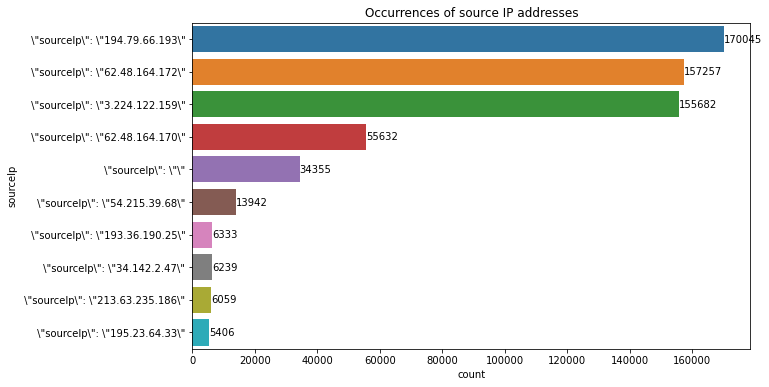

In [3]:
plt.figure(figsize=(10, 6))
plt.xlabel('Occurrence')
plt.title('Occurrences of source IP addresses')

# create the barplot
ax = sns.barplot(x='count', y='sourceIp', data=occurrence)

# add exact numbers above each bar
for i in ax.containers:
    ax.bar_label(i, label_type='edge')
    
plt.show()

In [6]:
df1 = pd.read_csv('01-10.csv')
counts1 = df1.groupby('sourceIp')['sourceIp'].count().reset_index(name='count')
# display the counts
counts1_sorted = counts1.sort_values('count', ascending=False)
occurrence1=counts1_sorted.head(10) 
counts1_sorted.head(239)



,sourceIp,count
57,"\""sourceIp\"": \""194.79.66.193\""",1536853
195,"\""sourceIp\"": \""62.48.164.172\""",1101416
123,"\""sourceIp\"": \""3.224.122.159\""",829055
21,"\""sourceIp\"": \""147.161.190.206\""",579315
194,"\""sourceIp\"": \""62.48.164.170\""",555619
...,...,...
24,"\""sourceIp\"": \""157.55.39.228\""",1
125,"\""sourceIp\"": \""3.235.195.48\""",1
4,"\""sourceIp\"": \""104.168.40.232\""",1
124,"\""sourceIp\"": \""3.231.163.181\""",1


In [7]:
df1
counts1 = df1.groupby('sourceIp')['sourceIp'].count().sort_values(ascending=False).reset_index(name='count')
counts1

,sourceIp,count
0,"\""sourceIp\"": \""194.79.66.193\""",1536853
1,"\""sourceIp\"": \""62.48.164.172\""",1101416
2,"\""sourceIp\"": \""3.224.122.159\""",829055
3,"\""sourceIp\"": \""147.161.190.206\""",579315
4,"\""sourceIp\"": \""62.48.164.170\""",555619
...,...,...
234,"\""sourceIp\"": \""157.55.39.228\""",1
235,"\""sourceIp\"": \""3.235.195.48\""",1
236,"\""sourceIp\"": \""104.168.40.232\""",1
237,"\""sourceIp\"": \""3.231.163.181\""",1


In [8]:
counts1_sorted = counts1.sort_values('count', ascending=False)
occurrence1=counts1_sorted.head(10)
occurrence1['sourceIp'] = occurrence1['sourceIp'].str.split(':').str[-1].str.strip().str.replace('\"', '')
occurrence1['sourceIp'] =occurrence1['sourceIp'].str.strip('\\')
occurrence1=occurrence1.drop(5)
occurrence1

C:\Users\leube\AppData\Local\Temp\ipykernel_21532\2434928471.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  occurrence1['sourceIp'] = occurrence1['sourceIp'].str.split(':').str[-1].str.strip().str.replace('\"', '')
C:\Users\leube\AppData\Local\Temp\ipykernel_21532\2434928471.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  occurrence1['sourceIp'] =occurrence1['sourceIp'].str.strip('\\')


,sourceIp,count
0,194.79.66.193,1536853
1,62.48.164.172,1101416
2,3.224.122.159,829055
3,147.161.190.206,579315
4,62.48.164.170,555619
6,193.36.190.25,194796
7,35.187.22.175,148573
8,54.215.39.68,137647
9,195.23.64.33,110303


In [65]:

occurrence1['sourceIp']


0      194.79.66.193
1      62.48.164.172
2      3.224.122.159
3    147.161.190.206
4      62.48.164.170
6      193.36.190.25
7      35.187.22.175
8       54.215.39.68
9       195.23.64.33
Name: sourceIp, dtype: object

In [84]:
import pandas as pd
from ip2geotools.databases.noncommercial import DbIpCity
# Example DataFrame with IP addresses
df = occurrence1

def get_city_country(ip_address):
    try:
        response = DbIpCity.get(ip_address, api_key='free')
        city = response.city
        country = response.country
        return f'{city}, {country}'
    except:
        return 'Unknown'

# Apply the function to the 'sourceIp' column
df['City_Country'] = df['sourceIp'].apply(get_city_country)

# Print the DataFrame with city and country names
print(df[['sourceIp', 'City_Country']])


          sourceIp                      City_Country
0    194.79.66.193                     Carnaxide, PT
1    62.48.164.172  Figueira da Foz Municipality, PT
2    3.224.122.159                       Ashburn, US
3  147.161.190.206                     San Roque, ES
4    62.48.164.170  Figueira da Foz Municipality, PT
6    193.36.190.25                        Lisbon, PT
7    35.187.22.175                      Brussels, BE
8     54.215.39.68                      San Jose, US
9     195.23.64.33                        Lisbon, PT


In [60]:
import folium

# Create a map centered on a specific location
m = folium.Map(location=[40, -100], zoom_start=4)

# Iterate over the DataFrame rows and add markers for each IP address
for index, row in df.iterrows():
    if row['City_Country']:
        ip = row['sourceIp']
        city_country = row['City_Country']
        city, country = city_country.split(', ')
        location = ipapi.location(ip, output='json')
        latitude = location.get('latitude')
        longitude = location.get('longitude')
        if latitude and longitude:
            folium.Marker([latitude, longitude], popup=f"{ip}<br>{city}, {country}").add_to(m)

# Display the map
m

ValueError: not enough values to unpack (expected 2, got 1)

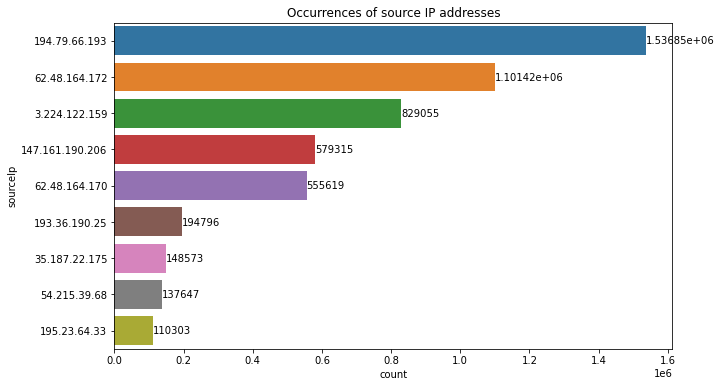

In [9]:
plt.figure(figsize=(10, 6))
plt.xlabel('Occurrence')
plt.title('Occurrences of source IP addresses')

# create the barplot
ax = sns.barplot(x='count', y='sourceIp', data=occurrence1)

# add exact numbers above each bar
for i in ax.containers:
    ax.bar_label(i, label_type='edge')
    
plt.show()

In [45]:
from datetime import datetime
df = pd.read_csv('1201.csv')
df['timestamp_req'] = df['timestamp_req'].astype(str)
df['timestamp_req'] = df['timestamp_req'].str[22:-5]
df['timestamp_resp'] = df['timestamp_resp'].str[23:-5]
df['timestamp_req'] = pd.to_datetime(df['timestamp_req'], format='%Y-%m-%d %H:%M:%S.%f')
df['timestamp_resp'] = pd.to_datetime(df['timestamp_resp'], format='%Y-%m-%d %H:%M:%S.%f')
df

,EventTime,MessageCode,EventId,IngestTime,sourceIp,httpMethod,httpUrl,Organization,app,user,timestamp_req,timestamp_resp
0,2022-12-01 00:00:02,"{""MessageCode"":""DDV1_HTTP""","""EventId"":""1C2L0954HE9891SWDMIIQQDCYZ""","""IngestTime"":""2022-12-01T00:00:02.5212922Z""","\""sourceIp\"": \""62.48.164.172\""","\""httpMethod\"": \""GET\""","\""httpUrl\"": \""https://api.docdigitizer.com/a...","\""organization\"": \""6b1faf26-cb89-4cc0-a158-d...","\""app\"": \""6b1faf26-cb89-4cc0-a158-d494e1c664...","\""user\"": null",2022-11-30 23:59:22.359,2022-11-30 23:59:22.446350
1,2022-12-01 00:00:02,"{""MessageCode"":""DDV1_HTTP""","""EventId"":""1IRV3A9VU0EAH1N2JQ9IM9W1W7""","""IngestTime"":""2022-12-01T00:00:02.5212948Z""","\""sourceIp\"": \""62.48.164.172\""","\""httpMethod\"": \""GET\""","\""httpUrl\"": \""https://api.docdigitizer.com/a...","\""organization\"": \""6b1faf26-cb89-4cc0-a158-d...","\""app\"": \""6b1faf26-cb89-4cc0-a158-d494e1c664...","\""user\"": null",2022-11-30 23:59:23.063,2022-11-30 23:59:23.166564
2,2022-12-01 00:00:02,"{""MessageCode"":""DDV1_HTTP""","""EventId"":""GJHS6KQXKDWTLV5H50VU3CM""","""IngestTime"":""2022-12-01T00:00:02.5212951Z""","\""sourceIp\"": \""193.36.190.25\""","\""httpMethod\"": \""GET\""","\""httpUrl\"": \""https://api.docdigitizer.com/a...","\""organization\"": \""09340114-ae3e-452e-9c7a-1...","\""app\"": \""09340114-ae3e-452e-9c7a-191f52d34d...","\""user\"": null",2022-11-30 23:59:24.384,2022-11-30 23:59:24.484244
3,2022-12-01 00:00:02,"{""MessageCode"":""DDV1_HTTP""","""EventId"":""1WGIVUU4P65I81K049SSGVUB7""","""IngestTime"":""2022-12-01T00:00:02.5212953Z""","\""sourceIp\"": \""62.48.164.172\""","\""httpMethod\"": \""GET\""","\""httpUrl\"": \""https://api.docdigitizer.com/a...","\""organization\"": \""6b1faf26-cb89-4cc0-a158-d...","\""app\"": \""6b1faf26-cb89-4cc0-a158-d494e1c664...","\""user\"": null",2022-11-30 23:59:24.936,2022-11-30 23:59:25.030972
4,2022-12-01 00:00:02,"{""MessageCode"":""DDV1_HTTP""","""EventId"":""WPL2LQGIU51Z13CK9XDVMBKPR""","""IngestTime"":""2022-12-01T00:00:02.5212956Z""","\""sourceIp\"": \""62.48.164.172\""","\""httpMethod\"": \""GET\""","\""httpUrl\"": \""https://api.docdigitizer.com/a...","\""organization\"": \""6b1faf26-cb89-4cc0-a158-d...","\""app\"": \""6b1faf26-cb89-4cc0-a158-d494e1c664...","\""user\"": null",2022-11-30 23:59:25.077,2022-11-30 23:59:25.164247
...,...,...,...,...,...,...,...,...,...,...,...,...
643183,2022-12-01 23:59:49,"{""MessageCode"":""DDV1_HTTP""","""EventId"":""58XXNIPSW73U4W3J9QE9T7M9""","""IngestTime"":""2022-12-01T23:59:49.4118017Z""","\""sourceIp\"": \""54.215.39.68\""","\""httpMethod\"": \""GET\""","\""httpUrl\"": \""https://api.docdigitizer.com/a...","\""organization\"": \""f00716b5-e120-4699-b827-7...","\""app\"": \""f00716b5-e120-4699-b827-791d6e2a25...","\""user\"": null",2022-12-01 23:59:40.093,2022-12-01 23:59:40.180348
643184,2022-12-01 23:59:49,"{""MessageCode"":""DDV1_HTTP""","""EventId"":""1BVR66GRK50RI1WPFSC62HOTQN""","""IngestTime"":""2022-12-01T23:59:49.411802Z""","\""sourceIp\"": \""62.48.164.170\""","\""httpMethod\"": \""GET\""","\""httpUrl\"": \""https://api.docdigitizer.com/a...","\""organization\"": \""lara.andrade-org\""","\""app\"": \""lara.andrade-org_app\""","\""user\"": null",2022-12-01 23:59:43.490,2022-12-01 23:59:43.491735
643185,2022-12-01 23:59:49,"{""MessageCode"":""DDV1_HTTP""","""EventId"":""15QXUEP0KLO88N6D0J8KDFD7J""","""IngestTime"":""2022-12-01T23:59:49.4118023Z""","\""sourceIp\"": \""62.48.164.170\""","\""httpMethod\"": \""GET\""","\""httpUrl\"": \""https://api.docdigitizer.com/a...","\""organization\"": \""lara.andrade-org\""","\""app\"": \""lara.andrade-org_app\""","\""user\"": null",2022-12-01 23:59:43.914,2022-12-01 23:59:43.916089
643186,2022-12-01 23:59:49,"{""MessageCode"":""DDV1_HTTP""","""EventId"":""1G0JD457D98VUSVPGNEOSK9JG""","""IngestTime"":""2022-12-01T23:59:49.4118026Z""","\""sourceIp\"": \""62.48.164.170\""","\""httpMethod\"": \""GET\""","\""httpUrl\"": \""https://api.docdigitizer.co

In [46]:
df_2=df.copy()
df_2['Req_Time'] = pd.to_datetime(df_2['timestamp_req']).dt.time
df_2['Resp_Time'] = pd.to_datetime(df_2['timestamp_resp']).dt.time

# Calculate the difference between the time columns
df_2['Time_Diff'] = (pd.to_datetime(df_2['timestamp_resp']) - pd.to_datetime(df_2['timestamp_req'])).dt.total_seconds()

# View the resulting DataFrame
print(df_2)
df_2['hour'] = pd.to_datetime(df_2['timestamp_resp']).dt.hour
df_2

                  EventTime                 MessageCode  \
0       2022-12-01 00:00:02  {"MessageCode":"DDV1_HTTP"   
1       2022-12-01 00:00:02  {"MessageCode":"DDV1_HTTP"   
2       2022-12-01 00:00:02  {"MessageCode":"DDV1_HTTP"   
3       2022-12-01 00:00:02  {"MessageCode":"DDV1_HTTP"   
4       2022-12-01 00:00:02  {"MessageCode":"DDV1_HTTP"   
...                     ...                         ...   
643183  2022-12-01 23:59:49  {"MessageCode":"DDV1_HTTP"   
643184  2022-12-01 23:59:49  {"MessageCode":"DDV1_HTTP"   
643185  2022-12-01 23:59:49  {"MessageCode":"DDV1_HTTP"   
643186  2022-12-01 23:59:49  {"MessageCode":"DDV1_HTTP"   
643187  2022-12-01 23:59:49  {"MessageCode":"DDV1_HTTP"   

                                       EventId  \
0       "EventId":"1C2L0954HE9891SWDMIIQQDCYZ"   
1       "EventId":"1IRV3A9VU0EAH1N2JQ9IM9W1W7"   
2          "EventId":"GJHS6KQXKDWTLV5H50VU3CM"   
3        "EventId":"1WGIVUU4P65I81K049SSGVUB7"   
4        "EventId":"WPL2LQGIU51Z13CK9XDVM

,EventTime,MessageCode,EventId,IngestTime,sourceIp,httpMethod,httpUrl,Organization,app,user,timestamp_req,timestamp_resp,Req_Time,Resp_Time,Time_Diff,hour
0,2022-12-01 00:00:02,"{""MessageCode"":""DDV1_HTTP""","""EventId"":""1C2L0954HE9891SWDMIIQQDCYZ""","""IngestTime"":""2022-12-01T00:00:02.5212922Z""","\""sourceIp\"": \""62.48.164.172\""","\""httpMethod\"": \""GET\""","\""httpUrl\"": \""https://api.docdigitizer.com/a...","\""organization\"": \""6b1faf26-cb89-4cc0-a158-d...","\""app\"": \""6b1faf26-cb89-4cc0-a158-d494e1c664...","\""user\"": null",2022-11-30 23:59:22.359,2022-11-30 23:59:22.446350,23:59:22.359000,23:59:22.446350,0.087350,23
1,2022-12-01 00:00:02,"{""MessageCode"":""DDV1_HTTP""","""EventId"":""1IRV3A9VU0EAH1N2JQ9IM9W1W7""","""IngestTime"":""2022-12-01T00:00:02.5212948Z""","\""sourceIp\"": \""62.48.164.172\""","\""httpMethod\"": \""GET\""","\""httpUrl\"": \""https://api.docdigitizer.com/a...","\""organization\"": \""6b1faf26-cb89-4cc0-a158-d...","\""app\"": \""6b1faf26-cb89-4cc0-a158-d494e1c664...","\""user\"": null",2022-11-30 23:59:23.063,2022-11-30 23:59:23.166564,23:59:23.063000,23:59:23.166564,0.103564,23
2,2022-12-01 00:00:02,"{""MessageCode"":""DDV1_HTTP""","""EventId"":""GJHS6KQXKDWTLV5H50VU3CM""","""IngestTime"":""2022-12-01T00:00:02.5212951Z""","\""sourceIp\"": \""193.36.190.25\""","\""httpMethod\"": \""GET\""","\""httpUrl\"": \""https://api.docdigitizer.com/a...","\""organization\"": \""09340114-ae3e-452e-9c7a-1...","\""app\"": \""09340114-ae3e-452e-9c7a-191f52d34d...","\""user\"": null",2022-11-30 23:59:24.384,2022-11-30 23:59:24.484244,23:59:24.384000,23:59:24.484244,0.100244,23
3,2022-12-01 00:00:02,"{""MessageCode"":""DDV1_HTTP""","""EventId"":""1WGIVUU4P65I81K049SSGVUB7""","""IngestTime"":""2022-12-01T00:00:02.5212953Z""","\""sourceIp\"": \""62.48.164.172\""","\""httpMethod\"": \""GET\""","\""httpUrl\"": \""https://api.docdigitizer.com/a...","\""organization\"": \""6b1faf26-cb89-4cc0-a158-d...","\""app\"": \""6b1faf26-cb89-4cc0-a158-d494e1c664...","\""user\"": null",2022-11-30 23:59:24.936,2022-11-30 23:59:25.030972,23:59:24.936000,23:59:25.030972,0.094972,23
4,2022-12-01 00:00:02,"{""MessageCode"":""DDV1_HTTP""","""EventId"":""WPL2LQGIU51Z13CK9XDVMBKPR""","""IngestTime"":""2022-12-01T00:00:02.5212956Z""","\""sourceIp\"": \""62.48.164.172\""","\""httpMethod\"": \""GET\""","\""httpUrl\"": \""https://api.docdigitizer.com/a...","\""organization\"": \""6b1faf26-cb89-4cc0-a158-d...","\""app\"": \""6b1faf26-cb89-4cc0-a158-d494e1c664...","\""user\"": null",2022-11-30 23:59:25.077,2022-11-30 23:59:25.164247,23:59:25.077000,23:59:25.164247,0.087247,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643183,2022-12-01 23:59:49,"{""MessageCode"":""DDV1_HTTP""","""EventId"":""58XXNIPSW73U4W3J9QE9T7M9""","""IngestTime"":""2022-12-01T23:59:49.4118017Z""","\""sourceIp\"": \""54.215.39.68\""","\""httpMethod\"": \""GET\""","\""httpUrl\"": \""https://api.docdigitizer.com/a...","\""organization\"": \""f00716b5-e120-4699-b827-7...","\""app\"": \""f00716b5-e120-4699-b827-791d6e2a25...","\""user\"": null",2022-12-01 23:59:40.093,2022-12-01 23:59:40.180348,23:59:40.093000,23:59:40.180348,0.087348,23
643184,2022-12-01 23:59:49,"{""MessageCode"":""DDV1_HTTP""","""EventId"":""1BVR66GRK50RI1WPFSC62HOTQN""","""IngestTime"":""2022-12-01T23:59:49.411802Z""","\""sourceIp\"": \""62.48.164.170\""","\""httpMethod\"": \""GET\""","\""httpUrl\"": \""https://api.docdigitizer.com/a...","\""organization\"": \""lara.andrade-org\""","\""app\"": \""lara.andrade-org_app\""","\""user\"": null",2022-12-01 23:59:43.490,2022-12-01 23:59:43.491735,23:59:43.490000,23:59:43.491735,0.001735,23
643185,2022-12-01 23:59:49,"{""MessageCode"":""DDV1_HTTP""","""EventId"":""15QXUEP0KLO88N6D0J8KDFD7J""","""IngestTime"":""2022-12-01T23:59:49.4118023Z""","\""sourceIp\"": \""62.48.164.170\""","\""httpMethod\"": \""GET\""","\""httpUrl\"": \""https://api.docdigitizer.com/a...","\""organization\"": \""lara.andrade-org\""","\""app\"": \""lara.

In [15]:
df_2['Time_Diff'].describe()
df_2.describe()

,Time_Diff
count,643188.000000
mean,0.113178
std,0.330345
min,0.000260
25%,0.084150
50%,0.096581
75%,0.109224
max,46.098959


In [10]:
dfAPP=pd.read_csv('01-10APP.csv')
countsAPP = df.groupby('app')['app'].count().reset_index(name='count')
countsAPP
countsAPP_sorted = countsAPP.sort_values('count', ascending=False)
occurrenceAPP=countsAPP_sorted.head(10)
occurrenceAPP.describe()
occurrenceAPP

,app,count
17,"\""app\"": \""aefb00ca-0e49-43f5-b922-b4dd533b86...",169873
27,"\""app\"": \""f00716b5-e120-4699-b827-791d6e2a25...",169624
10,"\""app\"": \""6b1faf26-cb89-4cc0-a158-d494e1c664...",157257
30,"\""app\"": \""lara.andrade-org_app\""",55632
33,"\""app\"": null",51326
0,"\""app\"": \""09340114-ae3e-452e-9c7a-191f52d34d...",6333
8,"\""app\"": \""4f82e3b0-40a4-47b5-bfc3-12c701f31f...",6059
21,"\""app\"": \""benfica-org_app\""",5406
19,"\""app\"": \""b25f815c-cc24-45ad-9a3c-5141312d32...",3611
12,"\""app\"": \""859d79a1-fa30-4a69-9947-78f62ba4b1...",2838


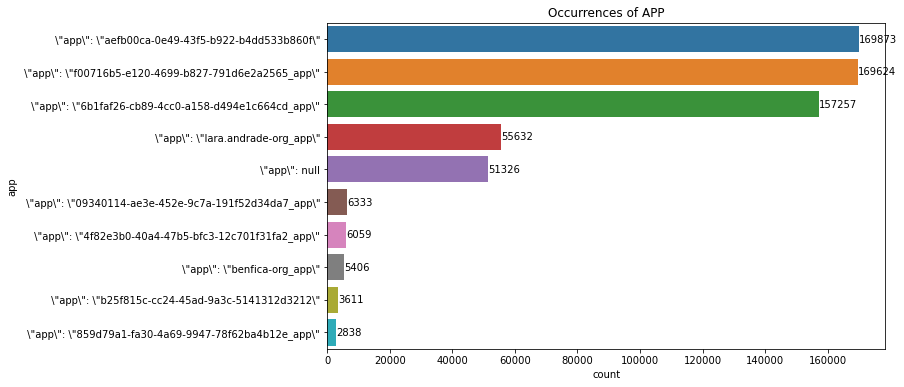

In [11]:
plt.figure(figsize=(10, 6))
plt.xlabel('Occurrence')
plt.title('Occurrences of APP')

# create the barplot
ax = sns.barplot(x='count', y='app', data=occurrenceAPP)

# add exact numbers above each bar
for i in ax.containers:
    ax.bar_label(i, label_type='edge')
    
plt.show()

In [20]:
Time = df_2.groupby('timestamp_resp')['EventId'].count().sort_values(ascending=False)

# Convert Time to a dataframe with Resp_Date and Events as columns
Time_df = Time.reset_index(name='Events')

# Print the dataframe
Time_df

,timestamp_resp,Events
0,2022-12-01 14:56:52.224155,2
1,2022-12-01 11:54:11.560234,2
2,2022-12-01 12:56:32.338558,2
3,2022-12-01 17:05:32.406486,2
4,2022-12-01 09:41:14.677360,2
...,...,...
643159,2022-12-01 08:05:28.407890,1
643160,2022-12-01 08:05:28.460630,1
643161,2022-12-01 08:05:28.476389,1
643162,2022-12-01 08:05:28.501841,1


In [12]:
Time = result.groupby('Req_Date')['EventId'].count().sort_values(ascending=False)

# Convert Time to a dataframe with Resp_Date and Events as columns
Time_df = Time.reset_index(name='Events')

# Print the dataframe
Time_df=Time_df.head(9)
Time_df

NameError: name 'result' is not defined

In [173]:
Time

Req_Date
2022-12-04    901844
2022-12-05    767791
2022-12-02    672016
2022-12-07    653364
2022-12-06    645504
2022-12-01    643050
2022-12-08    367833
2022-12-09    338292
2022-12-10    324138
2022-11-30       180
2022-12-03        63
Name: EventId, dtype: int64

In [1]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,6))
plt.scatter(Time_df['Req_Date'], Time_df['Events'])
plt.xlabel('Resp_Date')
plt.ylabel('Number of Events')
plt.title('Scatter Plot of 1201-1210 vs Events')
plt.xticks(rotation=90)
plt.show()

NameError: name 'Time_df' is not defined

<Figure size 1440x432 with 0 Axes>

In [13]:
import pandas as pd

import datetime
df3=pd.read_csv('01-10Organization.csv')
df3
df4=pd.read_csv('01-10timestamp_resp.csv')
df4
result = pd.concat([df3, df4], axis=1)

df4
result

,Organization,timestamp_resp
0,"\""organization\"": \""6b1faf26-cb89-4cc0-a158-d...","\""timestamp_resp\"": \""2022-11-30 23:59:22.446..."
1,"\""organization\"": \""6b1faf26-cb89-4cc0-a158-d...","\""timestamp_resp\"": \""2022-11-30 23:59:23.166..."
2,"\""organization\"": \""09340114-ae3e-452e-9c7a-1...","\""timestamp_resp\"": \""2022-11-30 23:59:24.484..."
3,"\""organization\"": \""6b1faf26-cb89-4cc0-a158-d...","\""timestamp_resp\"": \""2022-11-30 23:59:25.030..."
4,"\""organization\"": \""6b1faf26-cb89-4cc0-a158-d...","\""timestamp_resp\"": \""2022-11-30 23:59:25.164..."
...,...,...
6194980,"\""organization\"": \""09340114-ae3e-452e-9c7a-1...","\""timestamp_resp\"": \""2022-12-10 23:59:51.753..."
6194981,"\""organization\"": \""09340114-ae3e-452e-9c7a-1...","\""timestamp_resp\"": \""2022-12-10 23:59:50.884..."
6194982,"\""organization\"": \""09340114-ae3e-452e-9c7a-1...","\""timestamp_resp\"": \""2022-12-10 23:59:51.157..."
6194983,"\""organization\"": \""09340114-ae3e-452e-9c7a-1...","\""timestamp_resp\"": \""2022-12-10 23:59:52.035..."


In [14]:
import pandas as pd
import datetime
result['timestamp_resp']= result['timestamp_resp'].astype(str)
result['timestamp_resp'] = result['timestamp_resp'].str[23:-5]
result['timestamp_resp'] = pd.to_datetime(result['timestamp_resp'], format='%Y-%m-%d %H:%M:%S.%f')
result['Req_Date'] = result['timestamp_resp'].dt.date
result



,Organization,timestamp_resp,Req_Date
0,"\""organization\"": \""6b1faf26-cb89-4cc0-a158-d...",2022-11-30 23:59:22.446350,2022-11-30
1,"\""organization\"": \""6b1faf26-cb89-4cc0-a158-d...",2022-11-30 23:59:23.166564,2022-11-30
2,"\""organization\"": \""09340114-ae3e-452e-9c7a-1...",2022-11-30 23:59:24.484244,2022-11-30
3,"\""organization\"": \""6b1faf26-cb89-4cc0-a158-d...",2022-11-30 23:59:25.030972,2022-11-30
4,"\""organization\"": \""6b1faf26-cb89-4cc0-a158-d...",2022-11-30 23:59:25.164247,2022-11-30
...,...,...,...
6194980,"\""organization\"": \""09340114-ae3e-452e-9c7a-1...",2022-12-10 23:59:51.753927,2022-12-10
6194981,"\""organization\"": \""09340114-ae3e-452e-9c7a-1...",2022-12-10 23:59:50.884143,2022-12-10
6194982,"\""organization\"": \""09340114-ae3e-452e-9c7a-1...",2022-12-10 23:59:51.157851,2022-12-10
6194983,"\""organization\"": \""09340114-ae3e-452e-9c7a-1...",2022-12-10 23:59:52.035160,2022-12-10


In [29]:
result['Req_Date'] = result['timestamp_resp'].dt.date

In [16]:
import pandas as pd

import datetime
df5=pd.read_csv('01-10Organization.csv')
df5
df6=pd.read_csv('01-10timestamp_resp.csv')
df6
df7=pd.read_csv('01-10timestamp_req.csv')

result1 = pd.concat([df5, df6, df7], axis=1)
result1


,Organization,timestamp_resp,timestamp_req
0,"\""organization\"": \""6b1faf26-cb89-4cc0-a158-d...","\""timestamp_resp\"": \""2022-11-30 23:59:22.446...","\""timestamp_req\"": \""2022-11-30 23:59:22.3595..."
1,"\""organization\"": \""6b1faf26-cb89-4cc0-a158-d...","\""timestamp_resp\"": \""2022-11-30 23:59:23.166...","\""timestamp_req\"": \""2022-11-30 23:59:23.0631..."
2,"\""organization\"": \""09340114-ae3e-452e-9c7a-1...","\""timestamp_resp\"": \""2022-11-30 23:59:24.484...","\""timestamp_req\"": \""2022-11-30 23:59:24.3843..."
3,"\""organization\"": \""6b1faf26-cb89-4cc0-a158-d...","\""timestamp_resp\"": \""2022-11-30 23:59:25.030...","\""timestamp_req\"": \""2022-11-30 23:59:24.9367..."
4,"\""organization\"": \""6b1faf26-cb89-4cc0-a158-d...","\""timestamp_resp\"": \""2022-11-30 23:59:25.164...","\""timestamp_req\"": \""2022-11-30 23:59:25.0771..."
...,...,...,...
6194980,"\""organization\"": \""09340114-ae3e-452e-9c7a-1...","\""timestamp_resp\"": \""2022-12-10 23:59:51.753...","\""timestamp_req\"": \""2022-12-10 23:59:51.6422..."
6194981,"\""organization\"": \""09340114-ae3e-452e-9c7a-1...","\""timestamp_resp\"": \""2022-12-10 23:59:50.884...","\""timestamp_req\"": \""2022-12-10 23:59:50.7822..."
6194982,"\""organization\"": \""09340114-ae3e-452e-9c7a-1...","\""timestamp_resp\"": \""2022-12-10 23:59:51.157...","\""timestamp_req\"": \""2022-12-10 23:59:51.0593..."
6194983,"\""organization\"": \""09340114-ae3e-452e-9c7a-1...","\""timestamp_resp\"": \""2022-12-10 23:59:52.035...","\""timestamp_req\"": \""2022-12-10 23:59:51.9391..."


In [17]:
result1['Organization'] = result1['Organization'].str.split(':').str[-1].str.strip().str.replace('\"', '')
result1['Organization'] = result1['Organization'].str.strip('\\')
result1['Organization']

0          6b1faf26-cb89-4cc0-a158-d494e1c664cd
1          6b1faf26-cb89-4cc0-a158-d494e1c664cd
2          09340114-ae3e-452e-9c7a-191f52d34da7
3          6b1faf26-cb89-4cc0-a158-d494e1c664cd
4          6b1faf26-cb89-4cc0-a158-d494e1c664cd
                           ...                 
6194980    09340114-ae3e-452e-9c7a-191f52d34da7
6194981    09340114-ae3e-452e-9c7a-191f52d34da7
6194982    09340114-ae3e-452e-9c7a-191f52d34da7
6194983    09340114-ae3e-452e-9c7a-191f52d34da7
6194984    09340114-ae3e-452e-9c7a-191f52d34da7
Name: Organization, Length: 6194985, dtype: object

In [18]:
import pandas as pd
import datetime
result1['timestamp_resp']= result1['timestamp_resp'].astype(str)
result1['timestamp_resp'] = result1['timestamp_resp'].str[23:-5]
result1['timestamp_resp'] = pd.to_datetime(result1['timestamp_resp'], format='%Y-%m-%d %H:%M:%S.%f')
result1['Req_Date'] = result1['timestamp_resp'].dt.date
result1['timestamp_req']= result1['timestamp_req'].astype(str)
result1['timestamp_req'] = result1['timestamp_req'].str[22:-5]
result1['timestamp_resp'] = pd.to_datetime(result1['timestamp_resp'], format='%Y-%m-%d %H:%M:%S.%f')
result1

,Organization,timestamp_resp,timestamp_req,Req_Date
0,6b1faf26-cb89-4cc0-a158-d494e1c664cd,2022-11-30 23:59:22.446350,2022-11-30 23:59:22.359,2022-11-30
1,6b1faf26-cb89-4cc0-a158-d494e1c664cd,2022-11-30 23:59:23.166564,2022-11-30 23:59:23.063,2022-11-30
2,09340114-ae3e-452e-9c7a-191f52d34da7,2022-11-30 23:59:24.484244,2022-11-30 23:59:24.384,2022-11-30
3,6b1faf26-cb89-4cc0-a158-d494e1c664cd,2022-11-30 23:59:25.030972,2022-11-30 23:59:24.936,2022-11-30
4,6b1faf26-cb89-4cc0-a158-d494e1c664cd,2022-11-30 23:59:25.164247,2022-11-30 23:59:25.077,2022-11-30
...,...,...,...,...
6194980,09340114-ae3e-452e-9c7a-191f52d34da7,2022-12-10 23:59:51.753927,2022-12-10 23:59:51.642,2022-12-10
6194981,09340114-ae3e-452e-9c7a-191f52d34da7,2022-12-10 23:59:50.884143,2022-12-10 23:59:50.782,2022-12-10
6194982,09340114-ae3e-452e-9c7a-191f52d34da7,2022-12-10 23:59:51.157851,2022-12-10 23:59:51.059,2022-12-10
6194983,09340114-ae3e-452e-9c7a-191f52d34da7,2022-12-10 23:59:52.035160,2022-12-10 23:59:51.939,2022-12-10


In [19]:
result1['Time_Diff'] = (pd.to_datetime(result1['timestamp_resp']) - pd.to_datetime(result1['timestamp_req'])).dt.total_seconds()



In [20]:
result2=result1.copy
df9=pd.read_csv('01-10.csv')
result2= pd.concat([result1,df9], axis=1)

In [21]:
result2

,Organization,timestamp_resp,timestamp_req,Req_Date,Time_Diff,sourceIp
0,6b1faf26-cb89-4cc0-a158-d494e1c664cd,2022-11-30 23:59:22.446350,2022-11-30 23:59:22.359,2022-11-30,0.087350,"\""sourceIp\"": \""62.48.164.172\"""
1,6b1faf26-cb89-4cc0-a158-d494e1c664cd,2022-11-30 23:59:23.166564,2022-11-30 23:59:23.063,2022-11-30,0.103564,"\""sourceIp\"": \""62.48.164.172\"""
2,09340114-ae3e-452e-9c7a-191f52d34da7,2022-11-30 23:59:24.484244,2022-11-30 23:59:24.384,2022-11-30,0.100244,"\""sourceIp\"": \""193.36.190.25\"""
3,6b1faf26-cb89-4cc0-a158-d494e1c664cd,2022-11-30 23:59:25.030972,2022-11-30 23:59:24.936,2022-11-30,0.094972,"\""sourceIp\"": \""62.48.164.172\"""
4,6b1faf26-cb89-4cc0-a158-d494e1c664cd,2022-11-30 23:59:25.164247,2022-11-30 23:59:25.077,2022-11-30,0.087247,"\""sourceIp\"": \""62.48.164.172\"""
...,...,...,...,...,...,...
6194980,09340114-ae3e-452e-9c7a-191f52d34da7,2022-12-10 23:59:51.753927,2022-12-10 23:59:51.642,2022-12-10,0.111927,"\""sourceIp\"": \""193.36.190.25\"""
6194981,09340114-ae3e-452e-9c7a-191f52d34da7,2022-12-10 23:59:50.884143,2022-12-10 23:59:50.782,2022-12-10,0.102143,"\""sourceIp\"": \""193.36.190.25\"""
6194982,09340114-ae3e-452e-9c7a-191f52d34da7,2022-12-10 23:59:51.157851,2022-12-10 23:59:51.059,2022-12-10,0.098851,"\""sourceIp\"": \""193.36.190.25\"""
6194983,09340114-ae3e-452e-9c7a-191f52d34da7,2022-12-10 23:59:52.035160,2022-12-10 23:59:51.939,2022-12-10,0.096160,"\""sourceIp\"": \""193.36.190.25\"""


In [22]:

result2['sourceIp'] = result2['sourceIp'].str.split(':').str[-1].str.strip().str.replace('\"', '')
result2['sourceIp'] =result2['sourceIp'].str.strip('\\')
result2['sourceIp']

0          62.48.164.172
1          62.48.164.172
2          193.36.190.25
3          62.48.164.172
4          62.48.164.172
               ...      
6194980    193.36.190.25
6194981    193.36.190.25
6194982    193.36.190.25
6194983    193.36.190.25
6194984    193.36.190.25
Name: sourceIp, Length: 6194985, dtype: object

In [24]:
resultsource = result2.groupby('sourceIp')['sourceIp'].count().sort_values(ascending=False).reset_index(name='count')
resultsource

,sourceIp,count
0,194.79.66.193,1536853
1,62.48.164.172,1101416
2,3.224.122.159,829055
3,147.161.190.206,579315
4,62.48.164.170,555619
...,...,...
213,43.139.88.124,1
214,31.22.151.43,1
215,51133/nessus},1
216,85.245.42.183,1


In [36]:
import pandas as pd
from ip2geotools.databases.noncommercial import DbIpCity

# Example DataFrame with IP addresses
df = resultsource

def get_city_country(ip_address):
    try:
        response = DbIpCity.get(ip_address, api_key='free')
        city = response.city
        country = response.country
        return city, country
    except:
        return 'Unknown', 'Unknown'

# Apply the function to the 'sourceIp' column
df['City'], df['Country'] = zip(*df['sourceIp'].apply(get_city_country))

# Print the DataFrame with city and country names
df['Country'] = df['Country'].replace({'Unknown': 'Unknown'})  # Replace 'Unknown' with desired representation
print(df[['sourceIp', 'City', 'Country']])

            sourceIp                          City  Country
0      194.79.66.193                     Carnaxide       PT
1      62.48.164.172  Figueira da Foz Municipality       PT
2      3.224.122.159                       Ashburn       US
3    147.161.190.206                     San Roque       ES
4      62.48.164.170  Figueira da Foz Municipality       PT
..               ...                           ...      ...
213    43.139.88.124          Haidian (Haidian Qu)       CN
214     31.22.151.43                        Lisbon       PT
215    51133/nessus}                       Unknown  Unknown
216    85.245.42.183                        Lisbon       PT
217   44.197.147.109                      Sterling       US

[218 rows x 3 columns]


In [26]:
import pandas as pd
from ip2geotools.databases.noncommercial import DbIpCity

# Example DataFrame with IP addresses
df = resultsource

def get_city_country(ip_address):
    try:
        response = DbIpCity.get(ip_address, api_key='free')
        city = response.city
        country = response.country
        return f'{city}, {country}'
    except:
        return 'Unknown'

# Apply the function to the 'sourceIp' column
df['City_Country'] = df['sourceIp'].apply(get_city_country)

# Print the DataFrame with city and country names
print(df[['sourceIp', 'count','City_Country']])

            sourceIp    count                      City_Country
0      194.79.66.193  1536853                     Carnaxide, PT
1      62.48.164.172  1101416  Figueira da Foz Municipality, PT
2      3.224.122.159   829055                       Ashburn, US
3    147.161.190.206   579315                     San Roque, ES
4      62.48.164.170   555619  Figueira da Foz Municipality, PT
..               ...      ...                               ...
213    43.139.88.124        1          Haidian (Haidian Qu), CN
214     31.22.151.43        1                        Lisbon, PT
215    51133/nessus}        1                           Unknown
216    85.245.42.183        1                        Lisbon, PT
217   44.197.147.109        1                      Sterling, US

[218 rows x 3 columns]


In [35]:
import pandas as pd
import ipapi

# Example DataFrame with IP addresses
df = resultsource

def get_city_country(ip_address):
    try:
        response = ipapi.location(ip_address, output='json')
        city = response.get('city', 'Unknown')
        country = response.get('country_name', 'Unknown')
        return city, country
    except:
        return 'Unknown', 'Unknown'

# Apply the function to the 'sourceIp' column
df['City'], df['Country'] = zip(*df['sourceIp'].apply(get_city_country))

# Print the DataFrame with city and country names
df['Country'] = df['Country'].replace({'Unknown': 'Unknown'})  # Replace 'Unknown' with desired representation
print(df[['sourceIp', 'City', 'Country','count']])

            sourceIp     City   Country    count
0      194.79.66.193  Unknown   Unknown  1536853
1      62.48.164.172  Unknown   Unknown  1101416
2      3.224.122.159  Unknown   Unknown   829055
3    147.161.190.206  Unknown   Unknown   579315
4      62.48.164.170  Unknown   Unknown   555619
..               ...      ...       ...      ...
213    43.139.88.124  Unknown   Unknown        1
214     31.22.151.43   Lisbon  Portugal        1
215    51133/nessus}  Unknown   Unknown        1
216    85.245.42.183  Unknown   Unknown        1
217   44.197.147.109  Unknown   Unknown        1

[218 rows x 4 columns]


In [34]:
pip install ipapi

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


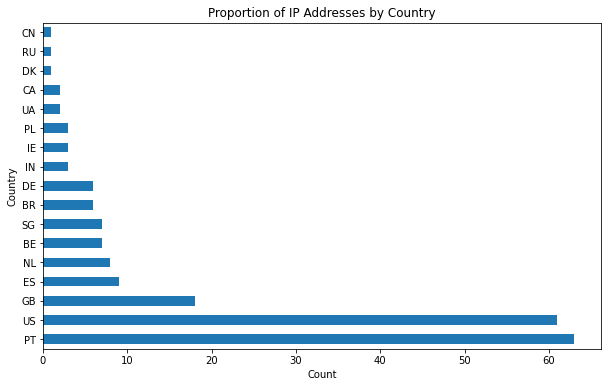

In [37]:
import matplotlib.pyplot as plt

# Filter out rows with unknown country
df_filtered = df[df['Country'] != 'Unknown']

# Count the occurrences of each country
country_counts = df_filtered['Country'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
country_counts.plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Country')
plt.title('Proportion of IP Addresses by Country')
plt.show()


In [368]:
import folium
from geopy.geocoders import Nominatim

# Create a map centered on a specific location
m = folium.Map(location=[40, -100], zoom_start=4)

# Create a geocoder instance
geolocator = Nominatim(user_agent="my_app")

# Iterate over the DataFrame rows and add markers for each IP address
for index, row in df.iterrows():
    ip_address = row['sourceIp']
    city = row['City']
    country = row['Country']
    
    try:
        location = geolocator.geocode(f"{city}, {country}")
        latitude = location.latitude
        longitude = location.longitude
        
        folium.Marker([latitude, longitude], popup=f"{ip_address}<br>{city}, {country}").add_to(m)
    
    except:
        continue

# Display the map
m




In [40]:
Time = result.groupby('Req_Date')['Organization'].count().sort_values(ascending=False)

# Convert Time to a dataframe with Resp_Date and Events as columns
Time_df = Time.reset_index(name='Organization')

# Print the dataframe
Time_df=Time_df.head(10)
Time_df['Organization'].describe()
Time_df

,Req_Date,Organization
0,2022-12-04,901844
1,2022-12-03,880858
2,2022-12-05,767791
3,2022-12-02,672121
4,2022-12-07,653364
5,2022-12-06,645504
6,2022-12-01,643050
7,2022-12-08,367833
8,2022-12-09,338292
9,2022-12-10,324138


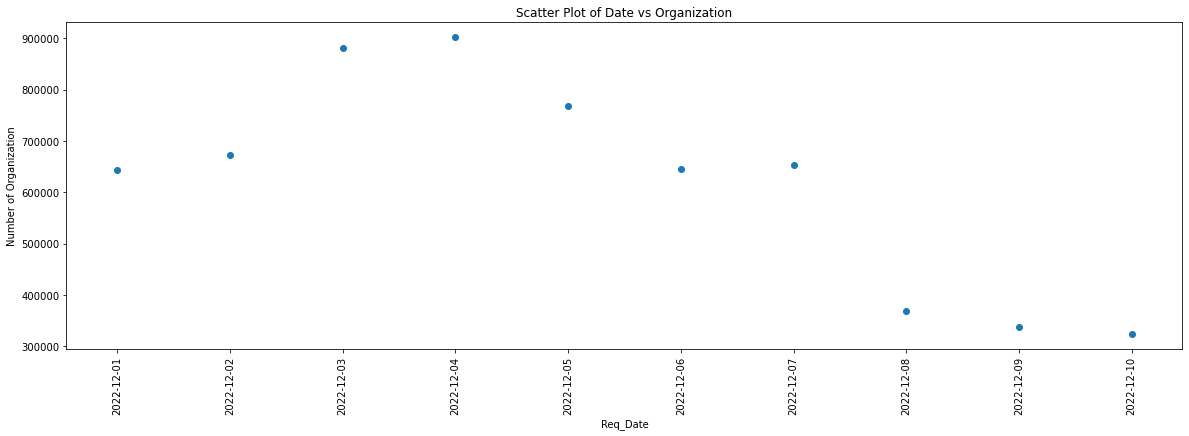

In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,6))
plt.scatter(Time_df['Req_Date'], Time_df['Organization'])
plt.xlabel('Req_Date')
plt.ylabel('Number of Organization')
plt.title('Scatter Plot of Date vs Organization')
plt.xticks(rotation=90)
plt.show()

In [42]:

Time1 =  result.groupby('Organization')['Organization'].count().sort_values(ascending=False).reset_index(name='count')
Time1= Time1.head(10)
Time1['Organization'] = Time1['Organization'].str.split(':').str[-1].str.strip().str.replace('\"', '')
Time1['Organization'] = Time1['Organization'].str.strip('\\')
Time1


,Organization,count
0,9360f6cc-a025-47db-bbf2-b4046f27f8a6,1660321
1,6b1faf26-cb89-4cc0-a158-d494e1c664cd,1104356
2,f00716b5-e120-4699-b827-791d6e2a2565,968023
3,bcd5ea8f-0fea-41cd-9bab-16582ca49666,580395
4,lara.andrade-org,555619
5,null,403443
6,09340114-ae3e-452e-9c7a-191f52d34da7,213156
7,pjgs.sousa-org,143564
8,benfica-org,118677
9,4f82e3b0-40a4-47b5-bfc3-12c701f31fa2,62473


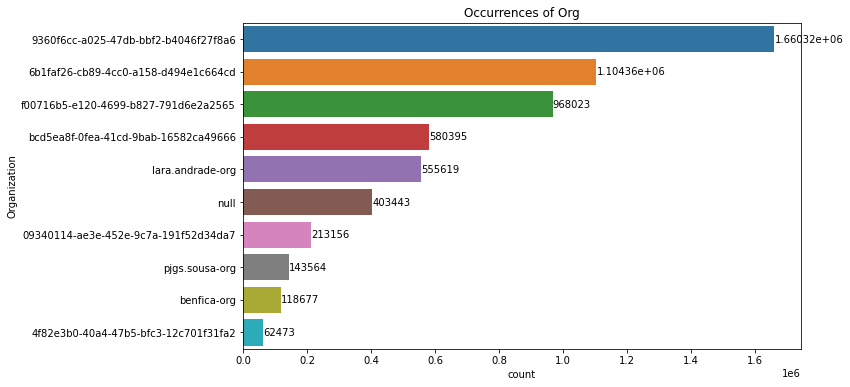

In [43]:
import pandas as pd #data manipulation
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(10, 6))
plt.xlabel('Organization')
plt.title('Occurrences of Org')

# create the barplot
ax = sns.barplot(x='count', y='Organization', data=Time1, orient='h')

# add exact numbers above each bar
for i in ax.containers:
    ax.bar_label(i, label_type='edge')
    
plt.show()

In [302]:
data = pd.read_csv("1204.csv")
data['timestamp_resp']= data['timestamp_resp'].astype(str)
data['timestamp_resp'] = data['timestamp_resp'].str[23:-5]
data['timestamp_resp'] = pd.to_datetime(result['timestamp_resp'], format='%Y-%m-%d %H:%M:%S.%f')
data


,EventTime,MessageCode,EventId,IngestTime,sourceIp,httpMethod,httpUrl,Organization,app,user,timestamp_req,timestamp_resp
0,2022-12-03 23:59:56,"{""MessageCode"":""DDV1_HTTP""","""EventId"":""A9BTS0QPV40N176UNX3EVWGZN""","""IngestTime"":""2022-12-03T23:59:56.233151Z""","\""sourceIp\"": \""54.215.39.68\""","\""httpMethod\"": \""GET\""","\""httpUrl\"": \""https://api.docdigitizer.com/a...","\""organization\"": \""f00716b5-e120-4699-b827-7...","\""app\"": \""f00716b5-e120-4699-b827-791d6e2a25...","\""user\"": null","\""timestamp_req\"": \""2022-12-03 23:59:47.3062...",2022-11-30 23:59:22.446350
1,2022-12-03 23:59:56,"{""MessageCode"":""DDV1_HTTP""","""EventId"":""8I2AVIGGMET11F5NOR9I85UZX""","""IngestTime"":""2022-12-03T23:59:56.2331539Z""","\""sourceIp\"": \""62.48.164.170\""","\""httpMethod\"": \""GET\""","\""httpUrl\"": \""https://api.docdigitizer.com/a...","\""organization\"": \""lara.andrade-org\""","\""app\"": \""lara.andrade-org_app\""","\""user\"": null","\""timestamp_req\"": \""2022-12-03 23:59:47.9901...",2022-11-30 23:59:23.166564
2,2022-12-03 23:59:56,"{""MessageCode"":""DDV1_HTTP""","""EventId"":""18HDLHZBKYAYNPF032Q8ROS47""","""IngestTime"":""2022-12-03T23:59:56.6140962Z""","\""sourceIp\"": \""194.79.66.193\""","\""httpMethod\"": \""GET\""","\""httpUrl\"": \""https://api.docdigitizer.com/a...","\""organization\"": \""9360f6cc-a025-47db-bbf2-b...","\""app\"": \""aefb00ca-0e49-43f5-b922-b4dd533b86...","\""user\"": null","\""timestamp_req\"": \""2022-12-03 23:59:35.1171...",2022-11-30 23:59:24.484244
3,2022-12-03 23:59:56,"{""MessageCode"":""DDV1_HTTP""","""EventId"":""I7CD9JISCBW51C84XKB8DT63L""","""IngestTime"":""2022-12-03T23:59:56.6141018Z""","\""sourceIp\"": \""194.79.66.193\""","\""httpMethod\"": \""GET\""","\""httpUrl\"": \""https://api.docdigitizer.com/a...","\""organization\"": \""9360f6cc-a025-47db-bbf2-b...","\""app\"": \""aefb00ca-0e49-43f5-b922-b4dd533b86...","\""user\"": null","\""timestamp_req\"": \""2022-12-03 23:59:36.6333...",2022-11-30 23:59:25.030972
4,2022-12-03 23:59:56,"{""MessageCode"":""DDV1_HTTP""","""EventId"":""VR4H4NJL25VT6C02EQ7CFI4L""","""IngestTime"":""2022-12-03T23:59:56.6141022Z""","\""sourceIp\"": \""194.79.66.193\""","\""httpMethod\"": \""GET\""","\""httpUrl\"": \""https://api.docdigitizer.com/a...","\""organization\"": \""9360f6cc-a025-47db-bbf2-b...","\""app\"": \""aefb00ca-0e49-43f5-b922-b4dd533b86...","\""user\"": null","\""timestamp_req\"": \""2022-12-03 23:59:37.5280...",2022-11-30 23:59:25.164247
...,...,...,...,...,...,...,...,...,...,...,...,...
901824,2022-12-04 23:59:54,"{""MessageCode"":""DDV1_HTTP""","""EventId"":""1WSBVPDJ1ZOF12A9N1R06MNBF""","""IngestTime"":""2022-12-04T23:59:54.8644136Z""","\""sourceIp\"": \""62.48.164.170\""","\""httpMethod\"": \""GET\""","\""httpUrl\"": \""https://api.docdigitizer.com/a...","\""organization\"": \""lara.andrade-org\""","\""app\"": \""lara.andrade-org_app\""","\""user\"": null","\""timestamp_req\"": \""2022-12-04 23:59:48.0749...",2022-12-02 13:02:42.421259
901825,2022-12-04 23:59:54,"{""MessageCode"":""DDV1_HTTP""","""EventId"":""RTZRJ6C9EJRX1JBR7TXSMU61Q""","""IngestTime"":""2022-12-04T23:59:54.8644139Z""","\""sourceIp\"": \""62.48.164.170\""","\""httpMethod\"": \""GET\""","\""httpUrl\"": \""https://api.docdigitizer.com/a...","\""organization\"": \""lara.andrade-org\""","\""app\"": \""lara.andrade-org_app\""","\""user\"": null","\""timestamp_req\"": \""2022-12-04 23:59:48.3038...",2022-12-02 13:02:42.642251
901826,2022-12-04 23:59:54,"{""MessageCode"":""DDV1_HTTP""","""EventId"":""H08CHDZO88PQY47CQXEUAT6M""","""IngestTime"":""2022-12-04T23:59:54.8644142Z""","\""sourceIp\"": \""193.36.190.25\""","\""httpMethod\"": \""GET\""","\""httpUrl\"": \""https://api.docdigitizer.com/a...","\""organization\"": \""09340114-ae3e-452e-9c7a-1...","\""app\"": \""09340114-ae3e-452e-9c7a-191f52d34d...","\""user\"": null","\""timestamp_req\"": \""2022-12-04 23:59:48.7979...",2022-12-02 13:02:43.545303
901827,2022-12-04 23:59:54,"{""MessageCode"":""DDV1_H

0         23.0
1         23.0
2         23.0
3         23.0
4         23.0
          ... 
901824    13.0
901825    13.0
901826    13.0
901827    13.0
901828    13.0
Name: timestamp_resp, Length: 901829, dtype: float64

In [272]:
result

,Organization,timestamp_resp,Req_Date
0,"\""organization\"": \""6b1faf26-cb89-4cc0-a158-d...",2022-11-30 23:59:22.446350,2022-11-30
1,"\""organization\"": \""6b1faf26-cb89-4cc0-a158-d...",2022-11-30 23:59:23.166564,2022-11-30
2,"\""organization\"": \""09340114-ae3e-452e-9c7a-1...",2022-11-30 23:59:24.484244,2022-11-30
3,"\""organization\"": \""6b1faf26-cb89-4cc0-a158-d...",2022-11-30 23:59:25.030972,2022-11-30
4,"\""organization\"": \""6b1faf26-cb89-4cc0-a158-d...",2022-11-30 23:59:25.164247,2022-11-30
...,...,...,...
6194980,"\""organization\"": \""09340114-ae3e-452e-9c7a-1...",2022-12-10 23:59:51.753927,2022-12-10
6194981,"\""organization\"": \""09340114-ae3e-452e-9c7a-1...",2022-12-10 23:59:50.884143,2022-12-10
6194982,"\""organization\"": \""09340114-ae3e-452e-9c7a-1...",2022-12-10 23:59:51.157851,2022-12-10
6194983,"\""organization\"": \""09340114-ae3e-452e-9c7a-1...",2022-12-10 23:59:52.035160,2022-12-10


In [191]:

data['Organization'] = data['Organization'].str.split(':').str[-1].str.strip().str.replace('\"', '')


In [179]:
data1 =  data.groupby('Organization')['Organization'].count().sort_values(ascending=False).reset_index(name='count')

data1

,Organization,count
0,\f00716b5-e120-4699-b827-791d6e2a2565\,185124
1,\9360f6cc-a025-47db-bbf2-b4046f27f8a6\,180086
2,\bcd5ea8f-0fea-41cd-9bab-16582ca49666\,168865
3,\6b1faf26-cb89-4cc0-a158-d494e1c664cd\,167635
4,\lara.andrade-org\,54973
5,\09340114-ae3e-452e-9c7a-191f52d34da7\,49679
6,null,37568
7,\benfica-org\,16173
8,\8a35a680-cd7c-4d2b-9473-09f1d3e3d5ee\,8340
9,\1cd4e6a9-59ec-4cbf-bdbd-7e5149080163\,6575


In [199]:

keep_values = ['\\9360f6cc-a025-47db-bbf2-b4046f27f8a6\\','\\6b1faf26-cb89-4cc0-a158-d494e1c664cd\\','\\bcd5ea8f-0fea-41cd-9bab-16582ca49666\\']
data2 = data[data['Organization'].isin(keep_values)]
data2

,EventTime,MessageCode,EventId,IngestTime,sourceIp,httpMethod,httpUrl,Organization,app,user,timestamp_req,timestamp_resp
2,2022-12-03 23:59:56,"{""MessageCode"":""DDV1_HTTP""","""EventId"":""18HDLHZBKYAYNPF032Q8ROS47""","""IngestTime"":""2022-12-03T23:59:56.6140962Z""","\""sourceIp\"": \""194.79.66.193\""","\""httpMethod\"": \""GET\""","\""httpUrl\"": \""https://api.docdigitizer.com/a...",\9360f6cc-a025-47db-bbf2-b4046f27f8a6\,"\""app\"": \""aefb00ca-0e49-43f5-b922-b4dd533b86...","\""user\"": null","\""timestamp_req\"": \""2022-12-03 23:59:35.1171...",2022-11-30 23:59:24.484244
3,2022-12-03 23:59:56,"{""MessageCode"":""DDV1_HTTP""","""EventId"":""I7CD9JISCBW51C84XKB8DT63L""","""IngestTime"":""2022-12-03T23:59:56.6141018Z""","\""sourceIp\"": \""194.79.66.193\""","\""httpMethod\"": \""GET\""","\""httpUrl\"": \""https://api.docdigitizer.com/a...",\9360f6cc-a025-47db-bbf2-b4046f27f8a6\,"\""app\"": \""aefb00ca-0e49-43f5-b922-b4dd533b86...","\""user\"": null","\""timestamp_req\"": \""2022-12-03 23:59:36.6333...",2022-11-30 23:59:25.030972
4,2022-12-03 23:59:56,"{""MessageCode"":""DDV1_HTTP""","""EventId"":""VR4H4NJL25VT6C02EQ7CFI4L""","""IngestTime"":""2022-12-03T23:59:56.6141022Z""","\""sourceIp\"": \""194.79.66.193\""","\""httpMethod\"": \""GET\""","\""httpUrl\"": \""https://api.docdigitizer.com/a...",\9360f6cc-a025-47db-bbf2-b4046f27f8a6\,"\""app\"": \""aefb00ca-0e49-43f5-b922-b4dd533b86...","\""user\"": null","\""timestamp_req\"": \""2022-12-03 23:59:37.5280...",2022-11-30 23:59:25.164247
11,2022-12-03 23:59:56,"{""MessageCode"":""DDV1_HTTP""","""EventId"":""1IPGK99BAQB1T14306BAMIWC7P""","""IngestTime"":""2022-12-03T23:59:56.6141043Z""","\""sourceIp\"": \""62.48.164.172\""","\""httpMethod\"": \""GET\""","\""httpUrl\"": \""https://api.docdigitizer.com/a...",\6b1faf26-cb89-4cc0-a158-d494e1c664cd\,"\""app\"": \""6b1faf26-cb89-4cc0-a158-d494e1c664...","\""user\"": null","\""timestamp_req\"": \""2022-12-03 23:59:45.0949...",2022-11-30 23:59:27.482938
12,2022-12-03 23:59:56,"{""MessageCode"":""DDV1_HTTP""","""EventId"":""1M1GGDRA61OUP16AYJZC3UMH7D""","""IngestTime"":""2022-12-03T23:59:56.6141046Z""","\""sourceIp\"": \""62.48.164.172\""","\""httpMethod\"": \""GET\""","\""httpUrl\"": \""https://api.docdigitizer.com/a...",\6b1faf26-cb89-4cc0-a158-d494e1c664cd\,"\""app\"": \""6b1faf26-cb89-4cc0-a158-d494e1c664...","\""user\"": null","\""timestamp_req\"": \""2022-12-03 23:59:46.2479...",2022-11-30 23:59:28.209882
...,...,...,...,...,...,...,...,...,...,...,...,...
901810,2022-12-04 23:59:54,"{""MessageCode"":""DDV1_HTTP""","""EventId"":""R29FGRXTP4C21DFNW8EMSD8RU""","""IngestTime"":""2022-12-04T23:59:54.8644095Z""","\""sourceIp\"": \""62.48.164.172\""","\""httpMethod\"": \""GET\""","\""httpUrl\"": \""https://api.docdigitizer.com/a...",\6b1faf26-cb89-4cc0-a158-d494e1c664cd\,"\""app\"": \""6b1faf26-cb89-4cc0-a158-d494e1c664...","\""user\"": null","\""timestamp_req\"": \""2022-12-04 23:59:37.8085...",2022-12-02 13:02:37.596258
901811,2022-12-04 23:59:54,"{""MessageCode"":""DDV1_HTTP""","""EventId"":""7JMS69VTLAOVBLEJKNBQJXAF""","""IngestTime"":""2022-12-04T23:59:54.8644098Z""","\""sourceIp\"": \""62.48.164.172\""","\""httpMethod\"": \""GET\""","\""httpUrl\"": \""https://api.docdigitizer.com/a...",\6b1faf26-cb89-4cc0-a158-d494e1c664cd\,"\""app\"": \""6b1faf26-cb89-4cc0-a158-d494e1c664...","\""user\"": null","\""timestamp_req\"": \""2022-12-04 23:59:38.2414...",2022-12-02 13:02:37.671655
901812,2022-12-04 23:59:54,"{""MessageCode"":""DDV1_HTTP""","""EventId"":""3M3VR4ZAPHR5IR2A94984G0W""","""IngestTime"":""2022-12-04T23:59:54.8644101Z""","\""sourceIp\"": \""62.48.164.172\""","\""httpMethod\"": \""GET\""","\""httpUrl\"": \""https://api.docdigitizer.com/a...",\6b1faf26-cb89-4cc0-a158-d494e1c664cd\,"\""app\"": \""6b1faf26-cb89-4cc0-a158-d494e1c664...","\""user\"": null","\""timestamp_req\"": \""2022-12-04 23:59:39.4155...",2022-12-02 13:02:38.842827
901813,2022-12-04 23:59:54,"{""MessageCode"":""DDV1_HTTP""","""EventId"":""57GOVVB4FXR03D53FPNB6DLW

In [200]:
data2['Organization'] = data2['Organization'].replace('\\9360f6cc-a025-47db-bbf2-b4046f27f8a6\\', 0)
data2['Organization'] = data2['Organization'].replace('\\6b1faf26-cb89-4cc0-a158-d494e1c664cd\\', 1)
data2['Organization'] = data2['Organization'].replace('\\bcd5ea8f-0fea-41cd-9bab-16582ca49666\\', 2)
data2


C:\Users\leube\AppData\Local\Temp\ipykernel_47004\3286721706.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Organization'] = data2['Organization'].replace('\\9360f6cc-a025-47db-bbf2-b4046f27f8a6\\', 0)
C:\Users\leube\AppData\Local\Temp\ipykernel_47004\3286721706.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Organization'] = data2['Organization'].replace('\\6b1faf26-cb89-4cc0-a158-d494e1c664cd\\', 1)
C:\Users\leube\AppData\Local\Temp\ipykernel_47004\3286721706.py:3: SettingWithCopyWa

,EventTime,MessageCode,EventId,IngestTime,sourceIp,httpMethod,httpUrl,Organization,app,user,timestamp_req,timestamp_resp
2,2022-12-03 23:59:56,"{""MessageCode"":""DDV1_HTTP""","""EventId"":""18HDLHZBKYAYNPF032Q8ROS47""","""IngestTime"":""2022-12-03T23:59:56.6140962Z""","\""sourceIp\"": \""194.79.66.193\""","\""httpMethod\"": \""GET\""","\""httpUrl\"": \""https://api.docdigitizer.com/a...",0,"\""app\"": \""aefb00ca-0e49-43f5-b922-b4dd533b86...","\""user\"": null","\""timestamp_req\"": \""2022-12-03 23:59:35.1171...",2022-11-30 23:59:24.484244
3,2022-12-03 23:59:56,"{""MessageCode"":""DDV1_HTTP""","""EventId"":""I7CD9JISCBW51C84XKB8DT63L""","""IngestTime"":""2022-12-03T23:59:56.6141018Z""","\""sourceIp\"": \""194.79.66.193\""","\""httpMethod\"": \""GET\""","\""httpUrl\"": \""https://api.docdigitizer.com/a...",0,"\""app\"": \""aefb00ca-0e49-43f5-b922-b4dd533b86...","\""user\"": null","\""timestamp_req\"": \""2022-12-03 23:59:36.6333...",2022-11-30 23:59:25.030972
4,2022-12-03 23:59:56,"{""MessageCode"":""DDV1_HTTP""","""EventId"":""VR4H4NJL25VT6C02EQ7CFI4L""","""IngestTime"":""2022-12-03T23:59:56.6141022Z""","\""sourceIp\"": \""194.79.66.193\""","\""httpMethod\"": \""GET\""","\""httpUrl\"": \""https://api.docdigitizer.com/a...",0,"\""app\"": \""aefb00ca-0e49-43f5-b922-b4dd533b86...","\""user\"": null","\""timestamp_req\"": \""2022-12-03 23:59:37.5280...",2022-11-30 23:59:25.164247
11,2022-12-03 23:59:56,"{""MessageCode"":""DDV1_HTTP""","""EventId"":""1IPGK99BAQB1T14306BAMIWC7P""","""IngestTime"":""2022-12-03T23:59:56.6141043Z""","\""sourceIp\"": \""62.48.164.172\""","\""httpMethod\"": \""GET\""","\""httpUrl\"": \""https://api.docdigitizer.com/a...",1,"\""app\"": \""6b1faf26-cb89-4cc0-a158-d494e1c664...","\""user\"": null","\""timestamp_req\"": \""2022-12-03 23:59:45.0949...",2022-11-30 23:59:27.482938
12,2022-12-03 23:59:56,"{""MessageCode"":""DDV1_HTTP""","""EventId"":""1M1GGDRA61OUP16AYJZC3UMH7D""","""IngestTime"":""2022-12-03T23:59:56.6141046Z""","\""sourceIp\"": \""62.48.164.172\""","\""httpMethod\"": \""GET\""","\""httpUrl\"": \""https://api.docdigitizer.com/a...",1,"\""app\"": \""6b1faf26-cb89-4cc0-a158-d494e1c664...","\""user\"": null","\""timestamp_req\"": \""2022-12-03 23:59:46.2479...",2022-11-30 23:59:28.209882
...,...,...,...,...,...,...,...,...,...,...,...,...
901810,2022-12-04 23:59:54,"{""MessageCode"":""DDV1_HTTP""","""EventId"":""R29FGRXTP4C21DFNW8EMSD8RU""","""IngestTime"":""2022-12-04T23:59:54.8644095Z""","\""sourceIp\"": \""62.48.164.172\""","\""httpMethod\"": \""GET\""","\""httpUrl\"": \""https://api.docdigitizer.com/a...",1,"\""app\"": \""6b1faf26-cb89-4cc0-a158-d494e1c664...","\""user\"": null","\""timestamp_req\"": \""2022-12-04 23:59:37.8085...",2022-12-02 13:02:37.596258
901811,2022-12-04 23:59:54,"{""MessageCode"":""DDV1_HTTP""","""EventId"":""7JMS69VTLAOVBLEJKNBQJXAF""","""IngestTime"":""2022-12-04T23:59:54.8644098Z""","\""sourceIp\"": \""62.48.164.172\""","\""httpMethod\"": \""GET\""","\""httpUrl\"": \""https://api.docdigitizer.com/a...",1,"\""app\"": \""6b1faf26-cb89-4cc0-a158-d494e1c664...","\""user\"": null","\""timestamp_req\"": \""2022-12-04 23:59:38.2414...",2022-12-02 13:02:37.671655
901812,2022-12-04 23:59:54,"{""MessageCode"":""DDV1_HTTP""","""EventId"":""3M3VR4ZAPHR5IR2A94984G0W""","""IngestTime"":""2022-12-04T23:59:54.8644101Z""","\""sourceIp\"": \""62.48.164.172\""","\""httpMethod\"": \""GET\""","\""httpUrl\"": \""https://api.docdigitizer.com/a...",1,"\""app\"": \""6b1faf26-cb89-4cc0-a158-d494e1c664...","\""user\"": null","\""timestamp_req\"": \""2022-12-04 23:59:39.4155...",2022-12-02 13:02:38.842827
901813,2022-12-04 23:59:54,"{""MessageCode"":""DDV1_HTTP""","""EventId"":""57GOVVB4FXR03D53FPNB6DLW""","""IngestTime"":""2022-12-04T23:59:54.8644104Z""","\""sourceIp\"": \""62.48.164.172\""","\""httpMethod\"": \""GET\""","\""httpUrl\"": \""https://api.docdigitizer.com/a...",1,"\""app\"": \""6b1faf26-cb89-4cc0-a158-d494e1c664...","\""user\"": null","\""timestamp_req\"": \""2022-12-04 23:59:39.

In [208]:
from kmodes.kmodes import KModes
categorical_columns = [ 'MessageCode', 'EventId','sourceIp', 'httpMethod', 'httpUrl', 'app', 'user']
organization_column = 'Organization'


# Preprocess the categorical data
X = data2[categorical_columns]

# Perform k-modes clustering on categorical variables
km = KModes(n_clusters=3, init='Huang', n_init=5, verbose=1)
clusters = km.fit_predict(X)

# Add cluster labels to the DataFrame
data2['CategoricalCluster'] = clusters

# Add organization cluster labels based on the known groups
data2['OrganizationCluster'] = data2[organization_column].map({0: 'Group 1', 1: 'Group 2', 2: 'Group 3'})

# Print the resulting DataFrame with cluster labels
print(data2[['Organization', 'CategoricalCluster', 'OrganizationCluster']])

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 165647, cost: 1028685.0
Run 1, iteration: 2/100, moves: 0, cost: 1028685.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 1364967.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 1701583.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 165640, cost: 1028685.0
Run 4, iteration: 2/100, moves: 0, cost: 1028685.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 163648, cost: 1364971.0
Run 5, iteration: 2/100, moves: 0, cost: 1364971.0
Best run was number 1


C:\Users\leube\AppData\Local\Temp\ipykernel_47004\1461268377.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['CategoricalCluster'] = clusters
C:\Users\leube\AppData\Local\Temp\ipykernel_47004\1461268377.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['OrganizationCluster'] = data2[organization_column].map({0: 'Group 1', 1: 'Group 2', 2: 'Group 3'})


        Organization  CategoricalCluster OrganizationCluster
2                  0                   1             Group 1
3                  0                   1             Group 1
4                  0                   1             Group 1
11                 1                   2             Group 2
12                 1                   2             Group 2
...              ...                 ...                 ...
901810             1                   2             Group 2
901811             1                   2             Group 2
901812             1                   2             Group 2
901813             1                   2             Group 2
901814             1                   2             Group 2

[516586 rows x 3 columns]


In [245]:
import pandas as pd

# Assuming 'data' is your DataFrame containing the categorical variables
encoded_data = pd.get_dummies(Y)
encoded_data

,"sourceIp_ \""sourceIp\"": \""147.161.190.191\""","sourceIp_ \""sourceIp\"": \""147.161.190.206\""","sourceIp_ \""sourceIp\"": \""194.79.66.193\""","sourceIp_ \""sourceIp\"": \""62.48.164.172\""","app_ \""app\"": \""26c59bdd-3fea-4c9d-8723-da75a4250f68\""","app_ \""app\"": \""6b1faf26-cb89-4cc0-a158-d494e1c664cd_app\""","app_ \""app\"": \""aefb00ca-0e49-43f5-b922-b4dd533b860f\""","user_ \""user\"": null"
2,0,0,1,0,0,0,1,1
3,0,0,1,0,0,0,1,1
4,0,0,1,0,0,0,1,1
11,0,0,0,1,0,1,0,1
12,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...
901810,0,0,0,1,0,1,0,1
901811,0,0,0,1,0,1,0,1
901812,0,0,0,1,0,1,0,1
901813,0,0,0,1,0,1,0,1


In [266]:
data_encoded

,Organization,"sourceIp_ \""sourceIp\"": \""147.161.190.191\""","sourceIp_ \""sourceIp\"": \""147.161.190.206\""","sourceIp_ \""sourceIp\"": \""194.79.66.193\""","sourceIp_ \""sourceIp\"": \""62.48.164.172\""","app_ \""app\"": \""26c59bdd-3fea-4c9d-8723-da75a4250f68\""","app_ \""app\"": \""6b1faf26-cb89-4cc0-a158-d494e1c664cd_app\""","app_ \""app\"": \""aefb00ca-0e49-43f5-b922-b4dd533b860f\""","user_ \""user\"": null"
2,0,0,0,1,0,0,0,1,1
3,0,0,0,1,0,0,0,1,1
4,0,0,0,1,0,0,0,1,1
11,1,0,0,0,1,0,1,0,1
12,1,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...
901810,1,0,0,0,1,0,1,0,1
901811,1,0,0,0,1,0,1,0,1
901812,1,0,0,0,1,0,1,0,1
901813,1,0,0,0,1,0,1,0,1


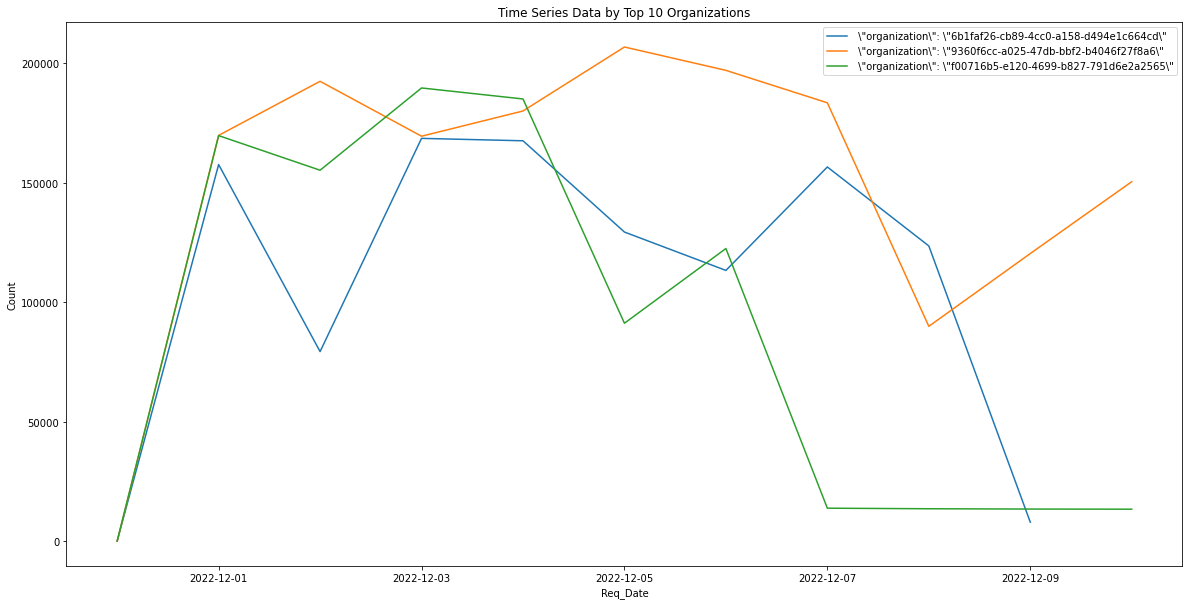

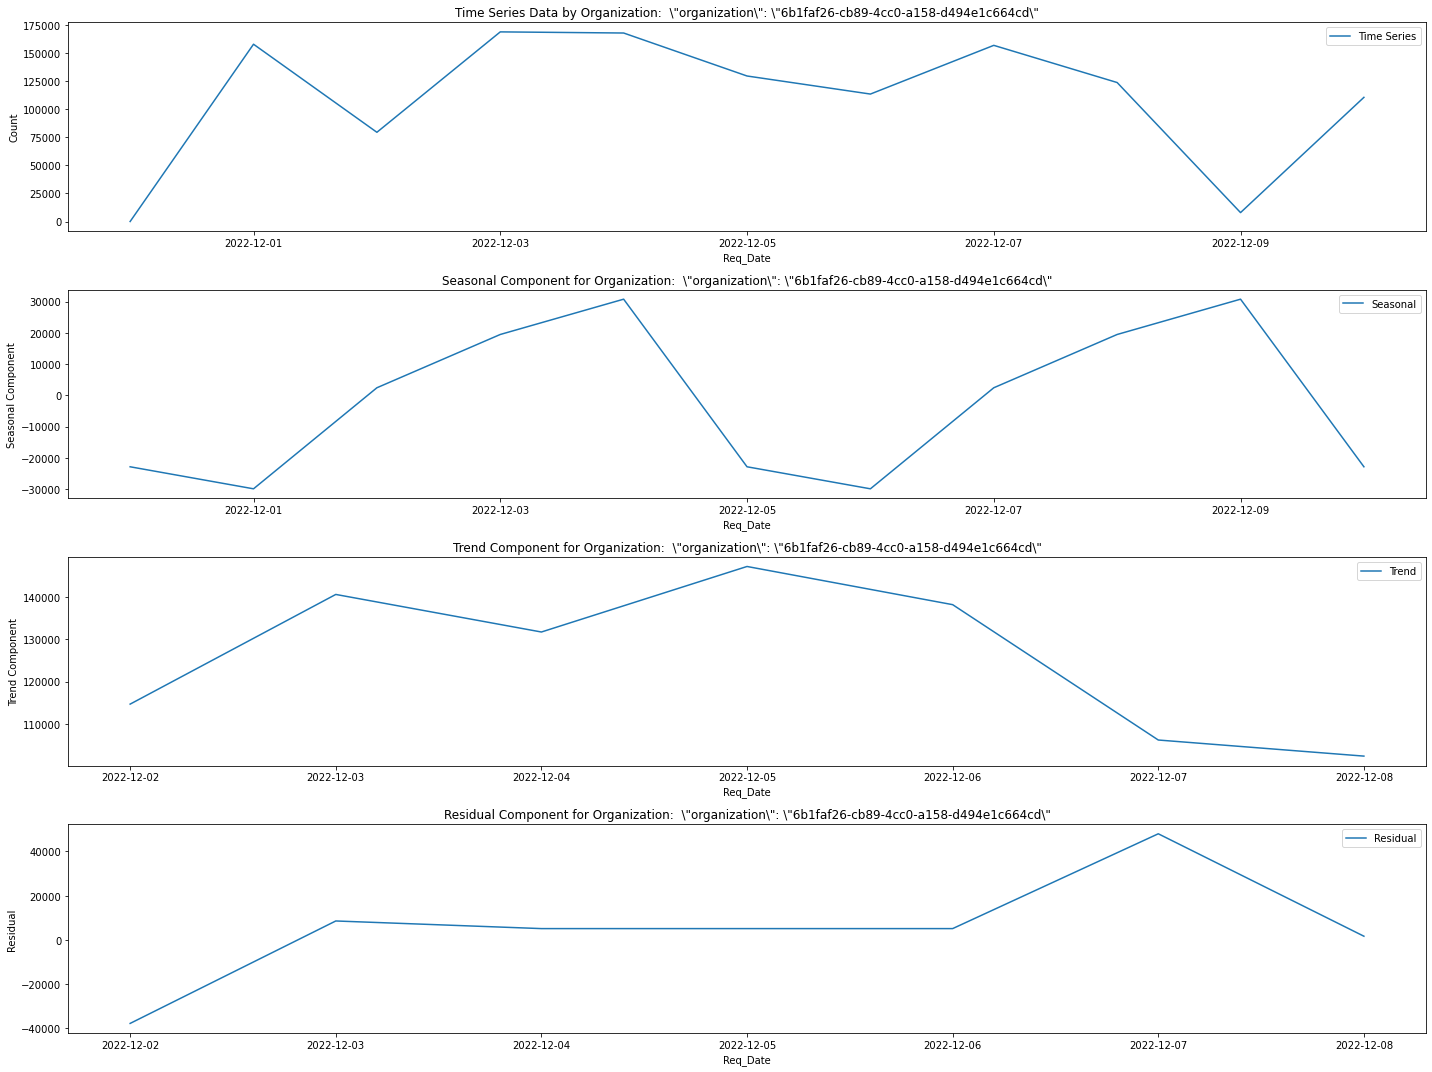

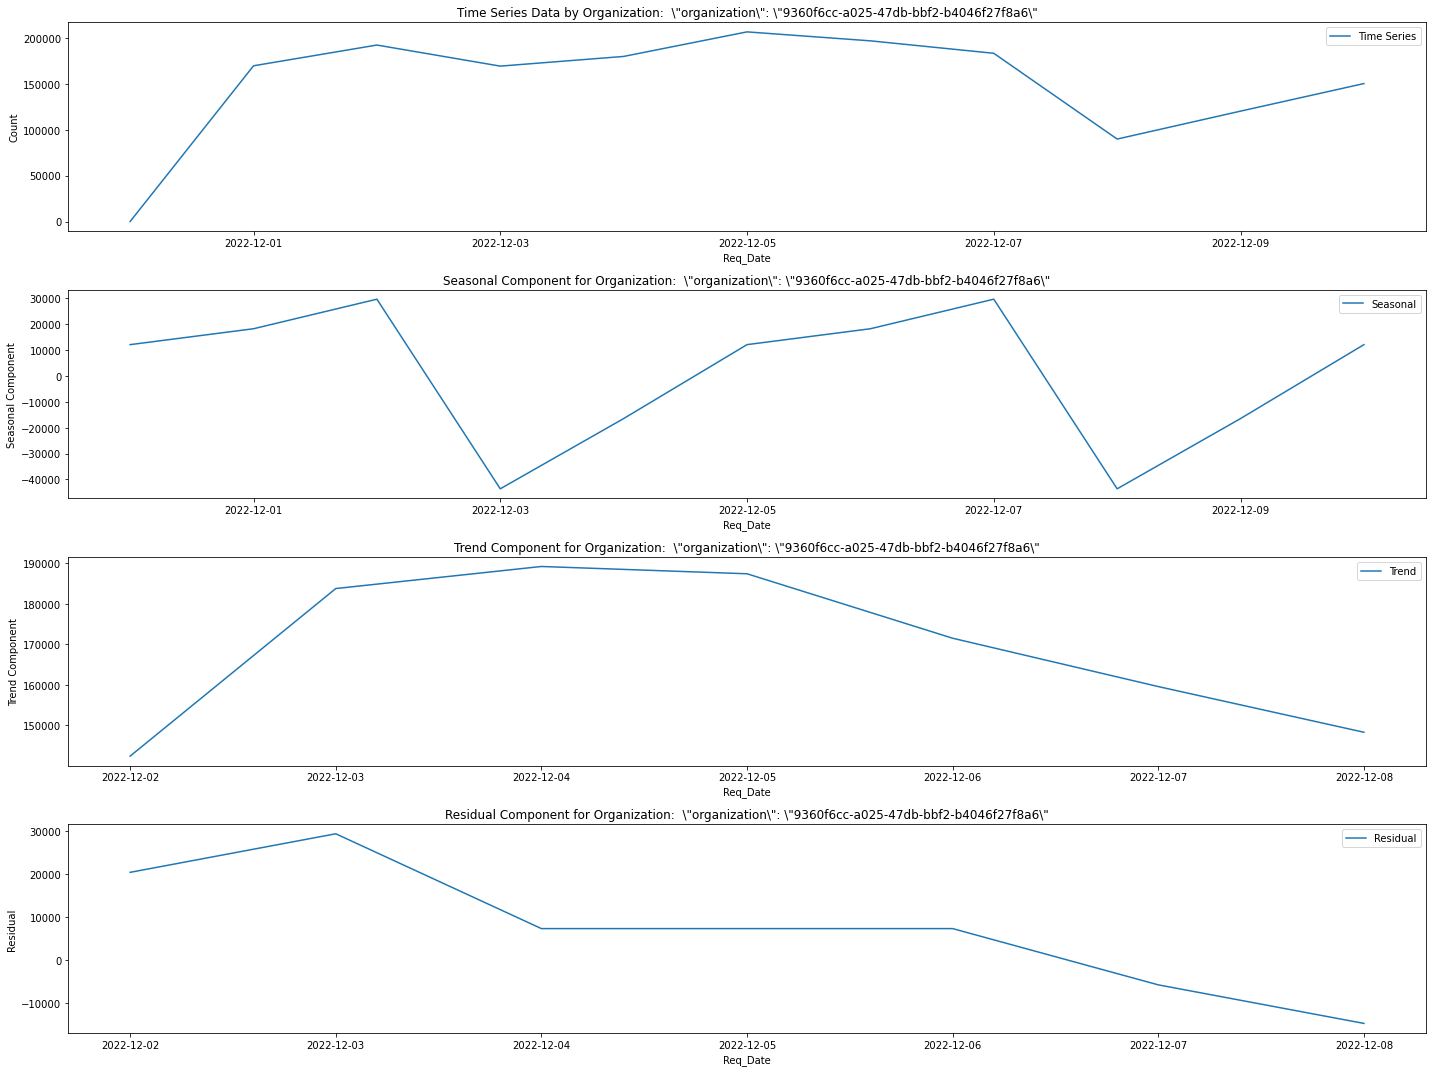

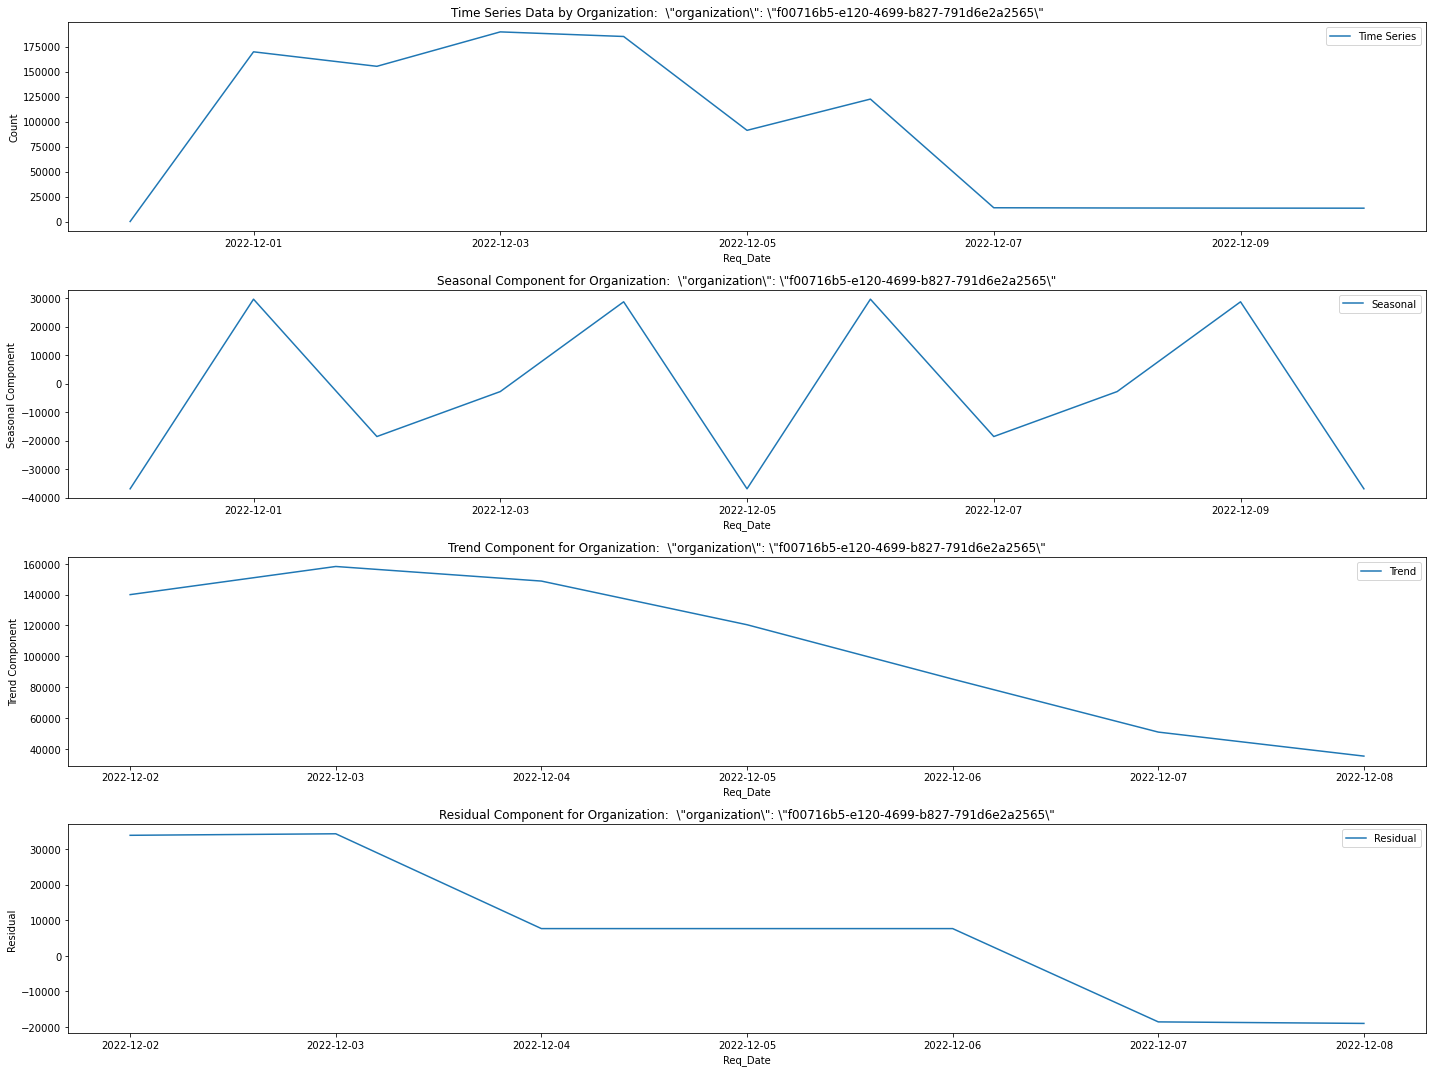

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
count_data = result.groupby(['Req_Date', 'Organization']).size().sort_values(ascending=False).reset_index(name='Count')
pivot_data = count_data.pivot(index='Req_Date', columns='Organization', values='Count')
top_organizations = count_data.groupby('Organization')['Count'].sum().nlargest(3).index
filtered_data = count_data[count_data['Organization'].isin(top_organizations)]

# Pivot the data to have 'Organization' as columns and 'timestamp_resp' as index
pivot_data = filtered_data.pivot(index='Req_Date', columns='Organization', values='Count')

# Plot the time series for each organization
plt.figure(figsize=(20, 10))

for organization in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[organization], label=str(organization))

plt.xlabel('Req_Date')
plt.ylabel('Count')
plt.title('Time Series Data by Top 10 Organizations')

plt.legend()
pivot_data = pivot_data.fillna(pivot_data.mean())


for organization in pivot_data.columns:
    # Perform seasonal decomposition
    decomposition = seasonal_decompose(pivot_data[organization], period=5)
    seasonal = decomposition.seasonal
    trend = decomposition.trend
    residual = decomposition.resid

    # Plot the time series and the seasonal component
    plt.figure(figsize=(20, 15))

    # Time series
    plt.subplot(4, 1, 1)
    plt.plot(pivot_data.index, pivot_data[organization], label='Time Series')
    plt.xlabel('Req_Date')
    plt.ylabel('Count')
    plt.title(f'Time Series Data by Organization: {organization}')
    plt.legend()

    # Seasonal component
    plt.subplot(4, 1, 2)
    plt.plot(pivot_data.index, seasonal, label='Seasonal')
    plt.xlabel('Req_Date')
    plt.ylabel('Seasonal Component')
    plt.title(f'Seasonal Component for Organization: {organization}')
    plt.legend()

    # Trend component
    plt.subplot(4, 1, 3)
    plt.plot(pivot_data.index, trend, label='Trend')
    plt.xlabel('Req_Date')
    plt.ylabel('Trend Component')
    plt.title(f'Trend Component for Organization: {organization}')
    plt.legend()

    # Residual component
    plt.subplot(4, 1, 4)
    plt.plot(pivot_data.index, residual, label='Residual')
    plt.xlabel('Req_Date')
    plt.ylabel('Residual')
    plt.title(f'Residual Component for Organization: {organization}')
    plt.legend()

    plt.tight_layout()
    plt.show()

NameError: name 'seasonal_decompose' is not defined

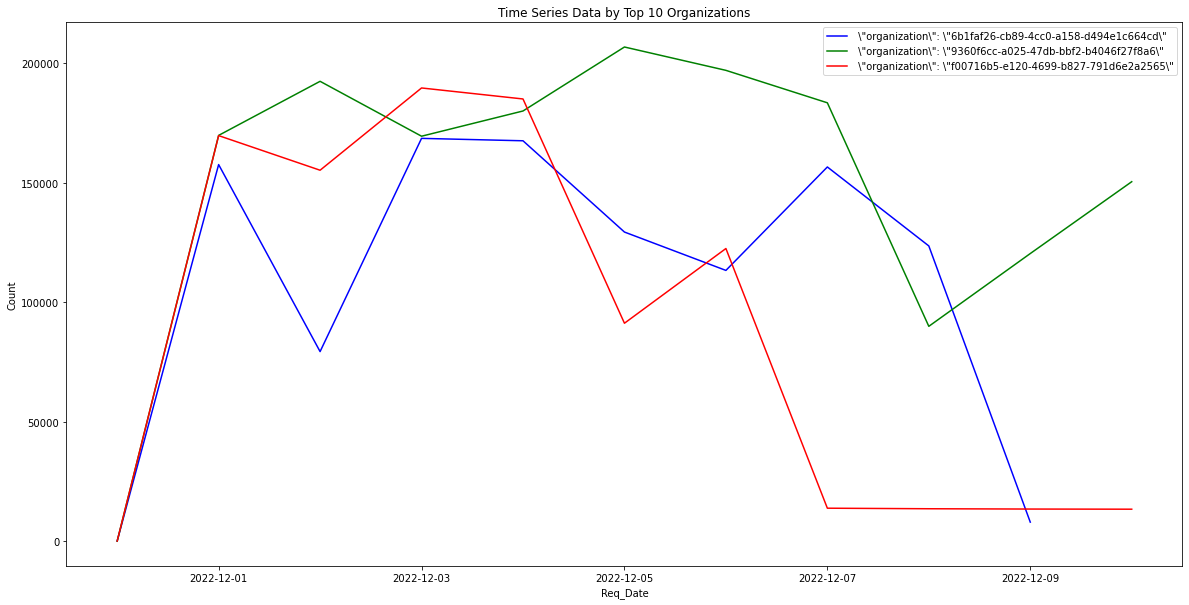

In [26]:
count_data = result.groupby(['Req_Date', 'Organization']).size().sort_values(ascending=False).reset_index(name='Count')
pivot_data = count_data.pivot(index='Req_Date', columns='Organization', values='Count')
top_organizations = count_data.groupby('Organization')['Count'].sum().nlargest(3).index
filtered_data = count_data[count_data['Organization'].isin(top_organizations)]

# Pivot the data to have 'Organization' as columns and 'timestamp_resp' as index
pivot_data = filtered_data.pivot(index='Req_Date', columns='Organization', values='Count')

# Plot the time series for each organization
plt.figure(figsize=(20, 10))

colors = ['blue', 'green', 'red']  # Specify colors for the organizations

for i, organization in enumerate(pivot_data.columns):
    plt.plot(pivot_data.index, pivot_data[organization], label=str(organization), color=colors[i])

plt.xlabel('Req_Date')
plt.ylabel('Count')
plt.title('Time Series Data by Top 10 Organizations')
plt.legend()

pivot_data = pivot_data.fillna(pivot_data.mean())

for i, organization in enumerate(pivot_data.columns):
    # Perform seasonal decomposition
    decomposition = seasonal_decompose(pivot_data[organization], period=5)
    seasonal = decomposition.seasonal
    trend = decomposition.trend
    residual = decomposition.resid

    # Plot the time series, seasonal component, trend, and residual
    plt.figure(figsize=(20, 15))

    # Time series
    plt.subplot(4, 1, 1)
    plt.plot(pivot_data.index, pivot_data[organization], label='Time Series', color=colors[i])
    plt.xlabel('Req_Date')
    plt.ylabel('Count')
    plt.title(f'Time Series Data by Organization: {organization}')
    plt.legend()

    # Seasonal component
    plt.subplot(4, 1, 2)
    plt.plot(pivot_data.index, seasonal, label='Seasonal', color=colors[i])
    plt.xlabel('Req_Date')
    plt.ylabel('Seasonal Component')
    plt.title(f'Seasonal Component for Organization: {organization}')
    plt.legend()

    # Trend component
    plt.subplot(4, 1, 3)
    plt.plot(pivot_data.index, trend, label='Trend', color=colors[i])
    plt.xlabel('Req_Date')
    plt.ylabel('Trend Component')
    plt.title(f'Trend Component for Organization: {organization}')
    plt.legend()

    # Residual component
    plt.subplot(4, 1, 4)
    plt.plot(pivot_data.index, residual, label='Residual', color=colors[i])
    plt.xlabel('Req_Date')
    plt.ylabel('Residual')
    plt.title(f'Residual Component for Organization: {organization}')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

df_2['hour'] = pd.to_numeric(df_2['hour'])
plt.figure(figsize=(15, 10)
sns.scatterplot(x=df_2['hour'], y=df_2['Time_Diff'], s=10)
plt.xlabel('Hour of the day')
plt.ylabel('Response Time (seconds)')
plt.show()
 



SyntaxError: invalid syntax (1811402534.py, line 6)

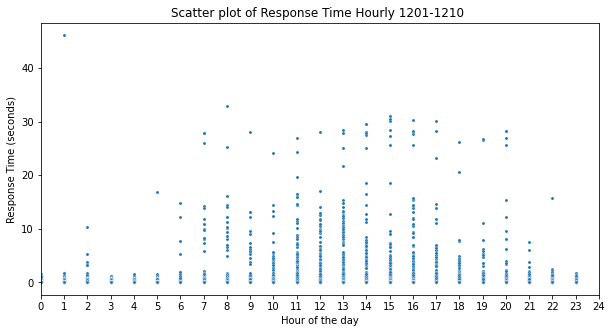

In [47]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df_2['hour'], y=df_2['Time_Diff'], s=10)
plt.title('Scatter plot of Response Time Hourly 1201-1210 ')
plt.xlim(0, 24)
plt.xticks(range(0, 25))
plt.xlabel('Hour of the day')
plt.ylabel('Response Time (seconds)')
plt.show()


In [42]:
result1

,Organization,timestamp_resp,timestamp_req,Req_Date,Time_Diff
0,6b1faf26-cb89-4cc0-a158-d494e1c664cd,2022-11-30 23:59:22.446350,2022-11-30 23:59:22.359,2022-11-30,0.087350
1,6b1faf26-cb89-4cc0-a158-d494e1c664cd,2022-11-30 23:59:23.166564,2022-11-30 23:59:23.063,2022-11-30,0.103564
2,09340114-ae3e-452e-9c7a-191f52d34da7,2022-11-30 23:59:24.484244,2022-11-30 23:59:24.384,2022-11-30,0.100244
3,6b1faf26-cb89-4cc0-a158-d494e1c664cd,2022-11-30 23:59:25.030972,2022-11-30 23:59:24.936,2022-11-30,0.094972
4,6b1faf26-cb89-4cc0-a158-d494e1c664cd,2022-11-30 23:59:25.164247,2022-11-30 23:59:25.077,2022-11-30,0.087247
...,...,...,...,...,...
6194980,09340114-ae3e-452e-9c7a-191f52d34da7,2022-12-10 23:59:51.753927,2022-12-10 23:59:51.642,2022-12-10,0.111927
6194981,09340114-ae3e-452e-9c7a-191f52d34da7,2022-12-10 23:59:50.884143,2022-12-10 23:59:50.782,2022-12-10,0.102143
6194982,09340114-ae3e-452e-9c7a-191f52d34da7,2022-12-10 23:59:51.157851,2022-12-10 23:59:51.059,2022-12-10,0.098851
6194983,09340114-ae3e-452e-9c7a-191f52d34da7,2022-12-10 23:59:52.035160,2022-12-10 23:59:51.939,2022-12-10,0.096160


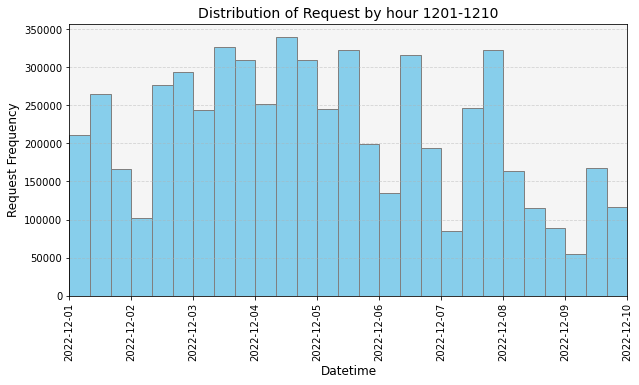

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
result['timestamp_resp'] = pd.to_datetime(result['timestamp_resp'])
plt.hist(result['timestamp_resp'], bins=30, color='skyblue', edgecolor='gray')
# Customize the plot appearance
plt.xlabel('Datetime', fontsize=12)
plt.ylabel('Request Frequency', fontsize=12)
plt.title('Distribution of Request by hour 1201-1210', fontsize=14)
plt.xticks(rotation='vertical')
plt.xlim(pd.Timestamp('2022-12-01'), pd.Timestamp('2022-12-10'))
# Customize the grid and background
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.gca().set_facecolor('whitesmoke')
plt.show()


In [40]:
result['Req_Date'] = pd.to_datetime(result['Req_Date'])
result['Req_Date'] = result['timestamp_resp'].dt.date
result

,Organization,timestamp_resp,Req_Date
0,"\""organization\"": \""6b1faf26-cb89-4cc0-a158-d...",2022-11-30 23:59:22.446350,2022-11-30
1,"\""organization\"": \""6b1faf26-cb89-4cc0-a158-d...",2022-11-30 23:59:23.166564,2022-11-30
2,"\""organization\"": \""09340114-ae3e-452e-9c7a-1...",2022-11-30 23:59:24.484244,2022-11-30
3,"\""organization\"": \""6b1faf26-cb89-4cc0-a158-d...",2022-11-30 23:59:25.030972,2022-11-30
4,"\""organization\"": \""6b1faf26-cb89-4cc0-a158-d...",2022-11-30 23:59:25.164247,2022-11-30
...,...,...,...
6194980,"\""organization\"": \""09340114-ae3e-452e-9c7a-1...",2022-12-10 23:59:51.753927,2022-12-10
6194981,"\""organization\"": \""09340114-ae3e-452e-9c7a-1...",2022-12-10 23:59:50.884143,2022-12-10
6194982,"\""organization\"": \""09340114-ae3e-452e-9c7a-1...",2022-12-10 23:59:51.157851,2022-12-10
6194983,"\""organization\"": \""09340114-ae3e-452e-9c7a-1...",2022-12-10 23:59:52.035160,2022-12-10


In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
from jupyter_dash import JupyterDash

app = JupyterDash(__name__)

# Define layout for the histogram page
histogram_page = html.Div([
    html.H2('Page 1'),
    dcc.Graph(
        id='histogram-chart',
        figure={
            'data': [
                {
                    'x': result['timestamp_resp'],
                    'type': 'histogram',
                    'nbinsx': 30,
                    'marker': {'color': 'skyblue', 'line': {'color': 'gray', 'width': 1}}
                }
            ],
            'layout': {
                'xaxis': {'title': 'Datetime', 'tickangle': -90},
                'yaxis': {'title': 'Request Frequency'},
                'title': 'Distribution of Request by hour 1201-1210',
                'plot_bgcolor': 'whitesmoke',
                'paper_bgcolor': 'whitesmoke',
                'showlegend': False,
                'height': 500
            }
        }
    )
])
# Define layout for the bar plot page
barplot_page = html.Div([
    html.H2('Page 2'),
    dcc.Graph(
        id='barplot-chart',
        figure={
            'data': [
                {
                    'x': Time1['count'],
                    'y': Time1['Organization'],
                    'type': 'bar',
                    'orientation': 'h'
                }
            ],
            'layout': {
                'xaxis': {'title': 'Count'},
                'yaxis': {'title': 'Organization'},
                'title': 'Occurrences of Organizations',
                'height': 600,
                'margin': {'l': 150, 'r': 50, 't': 50, 'b': 50},
                'plot_bgcolor': 'whitesmoke',
                'paper_bgcolor': 'whitesmoke',
                'showlegend': False
            }
        }
    )
])

# Define the app's layout
app.layout = html.Div([
    html.H1('Multi-Page Dashboard'),
    dcc.Dropdown(
        id='page-dropdown',
        options=[
            {'label': 'Page 1', 'value': 'page1'},
            {'label': 'Page 2', 'value': 'page2'}
        ],
        value='page1'
    ),
    html.Div(id='page-content')
])

# Define callback function to update the histogram chart
@app.callback(
    Output("histogram-chart", "figure"),
    [Input("date-range-slider", "value")]
)


# Define callback to update the page content
@app.callback(
    Output('page-content', 'children'),
    Input('page-dropdown', 'value'))
def update_page(value):
    if value == 'page1':
        return histogram_page
    elif value == 'page2':
        return barplot_page

# Run the application
if __name__ == '__main__':
    app.run_server(mode='inline')

Dash is running on http://127.0.0.1:8050/



C:\Users\leube\AppData\Local\Temp\ipykernel_52160\2621072410.py:7: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
C:\Users\leube\AppData\Local\Temp\ipykernel_52160\2621072410.py:8: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


Accuracy: 0.36068587847408584


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names



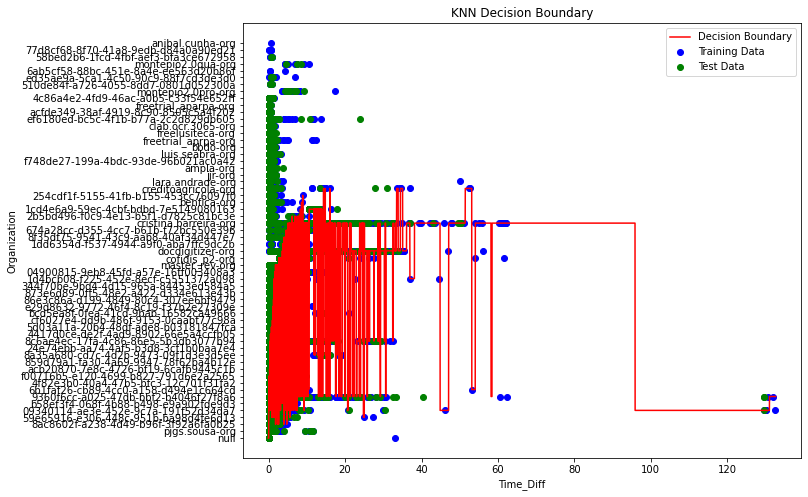

In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
data = result1

# Define the feature and target variables
X = data[['Time_Diff']]
y = data['Organization']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the KNN model
k = 3  # Number of neighbors to consider
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Visualize the decision boundary
x_min, x_max = X_train['Time_Diff'].min() - 0.1, X_train['Time_Diff'].max() + 0.1
step_size = 0.01
xx = np.arange(x_min, x_max, step_size).reshape(-1, 1)
yy = knn.predict(xx)

# Plot the decision boundary
plt.figure(figsize=(10, 8))
plt.plot(xx, yy, c='r', label='Decision Boundary')

# Plot the training points
plt.scatter(X_train['Time_Diff'], y_train, c='b', label='Training Data')
# Plot the test points
plt.scatter(X_test['Time_Diff'], y_test, c='g', label='Test Data')

plt.xlabel('Time_Diff')
plt.ylabel('Organization')
plt.title('KNN Decision Boundary')
plt.legend()
plt.show()

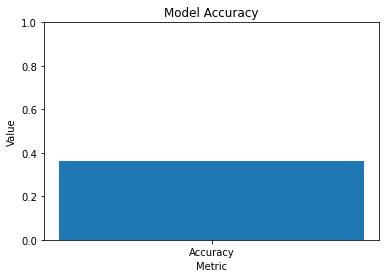

In [165]:
import matplotlib.pyplot as plt

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Create a bar plot
plt.figure(figsize=(6, 4))
plt.bar(['Accuracy'], [accuracy])
plt.ylim(0, 1)
plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('Model Accuracy')
plt.show()

In [225]:
result1= result1.dropna()
result1.isnull().sum()


Organization      0
timestamp_resp    0
timestamp_req     0
Req_Date          0
Time_Diff         0
dtype: int64

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
from jupyter_dash import JupyterDash
import folium
from geopy.geocoders import Nominatim

app = JupyterDash(__name__)

# Example DataFrame with IP addresses
df = resultsource

# Define layout for the histogram page
histogram_page = html.Div([
    html.H2('Page 1'),
    dcc.Graph(
        id='histogram-chart',
        figure={
            'data': [
                {
                    'x': result['timestamp_resp'],
                    'type': 'histogram',
                    'nbinsx': 30,
                    'marker': {'color': 'skyblue', 'line': {'color': 'gray', 'width': 1}}
                }
            ],
            'layout': {
                'xaxis': {'title': 'Datetime', 'tickangle': -90},
                'yaxis': {'title': 'Request Frequency'},
                'title': 'Distribution of Request by hour 1201-1210',
                'plot_bgcolor': 'whitesmoke',
                'paper_bgcolor': 'whitesmoke',
                'showlegend': False,
                'height': 500
            }
        }
    )
])

# Define layout for the bar plot page
barplot_page = html.Div([
    html.H2('Page 2'),
    dcc.Graph(
        id='barplot-chart',
        figure={
            'data': [
                {
                    'x': Time1['count'],
                    'y': Time1['Organization'],
                    'type': 'bar',
                    'orientation': 'h'
                }
            ],
            'layout': {
                'xaxis': {'title': 'Count'},
                'yaxis': {'title': 'Organization'},
                'title': 'Occurrences of Organizations',
                'height': 600,
                'margin': {'l': 150, 'r': 50, 't': 50, 'b': 50},
                'plot_bgcolor': 'whitesmoke',
                'paper_bgcolor': 'whitesmoke',
                'showlegend': False
            }
        }
    )
])

# Filter out rows with unknown country
df_filtered = df[df['Country'] != 'Unknown']

# Count the occurrences of each country
country_counts = df_filtered['Country'].value_counts()

# Define layout for page 3
page3 = html.Div([
    html.H2('Page 3'),
    dcc.Graph(
        id='country-counts-chart',
        figure={
            'data': [
                {
                    'x': country_counts.index,
                    'y': country_counts.values,
                    'type': 'bar',
                    'marker': {'color': 'skyblue', 'line': {'color': 'gray', 'width': 1}}
                }
            ],
            'layout': {
                'xaxis': {'title': 'Country'},
                'yaxis': {'title': 'Count'},
                'title': 'Proportion of IP Addresses by Country',
                'plot_bgcolor': 'whitesmoke',
                'paper_bgcolor': 'whitesmoke',
                'showlegend': False,
                'height': 600
            }
        }
    )
])

# Create a map centered on a specific location
m = folium.Map(location=[40, -100], zoom_start=4)

# Create a geocoder instance
geolocator = Nominatim(user_agent="my_app")

# Iterate over the DataFrame rows and add markers for each IP address
for index, row in df.iterrows():
    ip_address = row['sourceIp']
    city = row['City']
    country = row['Country']
    
    try:
        location = geolocator.geocode(f"{city}, {country}")
        latitude = location.latitude
        longitude = location.longitude
        
        folium.Marker([latitude, longitude], popup=f"{ip_address}<br>{city}, {country}").add_to(m)
    
    except:
        continue

# Define layout for page 4
page4 = html.Div([
    html.H2('Page 4'),
    html.Iframe(id='map', srcDoc=m._repr_html_(), width='100%', height='500px')
])

# Define the app's layout
app.layout = html.Div([
    html.H1('Multi-Page Dashboard'),
    dcc.Dropdown(
        id='page-dropdown',
        options=[
            {'label': 'Page 1', 'value': 'page1'},
            {'label': 'Page 2', 'value': 'page2'},
            {'label': 'Page 3', 'value': 'page3'},
            {'label': 'Page 4', 'value': 'page4'}
        ],
        value='page1'
    ),
    html.Div(id='page-content')
])

# Define callback function to update the histogram chart
@app.callback(
    Output("histogram-chart", "figure"),
    [Input("date-range-slider", "value")]
)

# Define callback to update the page content
@app.callback(
    Output('page-content', 'children'),
    Input('page-dropdown', 'value'))
def update_page(value):
    if value == 'page1':
        return histogram_page
    elif value == 'page2':
        return barplot_page
    elif value == 'page3':
        return page3
    elif value == 'page4':
        return page4

# Run the application
if __name__ == '__main__':
    app.run_server(mode='inline')

Dash is running on http://127.0.0.1:8050/



In [52]:
df

,sourceIp,count,City,Country,City_Country
0,194.79.66.193,1536853,Carnaxide,PT,"Carnaxide, PT"
1,62.48.164.172,1101416,Figueira da Foz Municipality,PT,"Figueira da Foz Municipality, PT"
2,3.224.122.159,829055,Ashburn,US,"Ashburn, US"
3,147.161.190.206,579315,San Roque,ES,"San Roque, ES"
4,62.48.164.170,555619,Figueira da Foz Municipality,PT,"Figueira da Foz Municipality, PT"
...,...,...,...,...,...
213,43.139.88.124,1,Haidian (Haidian Qu),CN,"Haidian (Haidian Qu), CN"
214,31.22.151.43,1,Lisbon,PT,"Lisbon, PT"
215,51133/nessus},1,Unknown,Unknown,Unknown
216,85.245.42.183,1,Lisbon,PT,"Lisbon, PT"


In [54]:
result2

,Organization,timestamp_resp,timestamp_req,Req_Date,Time_Diff,sourceIp
0,6b1faf26-cb89-4cc0-a158-d494e1c664cd,2022-11-30 23:59:22.446350,2022-11-30 23:59:22.359,2022-11-30,0.087350,62.48.164.172
1,6b1faf26-cb89-4cc0-a158-d494e1c664cd,2022-11-30 23:59:23.166564,2022-11-30 23:59:23.063,2022-11-30,0.103564,62.48.164.172
2,09340114-ae3e-452e-9c7a-191f52d34da7,2022-11-30 23:59:24.484244,2022-11-30 23:59:24.384,2022-11-30,0.100244,193.36.190.25
3,6b1faf26-cb89-4cc0-a158-d494e1c664cd,2022-11-30 23:59:25.030972,2022-11-30 23:59:24.936,2022-11-30,0.094972,62.48.164.172
4,6b1faf26-cb89-4cc0-a158-d494e1c664cd,2022-11-30 23:59:25.164247,2022-11-30 23:59:25.077,2022-11-30,0.087247,62.48.164.172
...,...,...,...,...,...,...
6194980,09340114-ae3e-452e-9c7a-191f52d34da7,2022-12-10 23:59:51.753927,2022-12-10 23:59:51.642,2022-12-10,0.111927,193.36.190.25
6194981,09340114-ae3e-452e-9c7a-191f52d34da7,2022-12-10 23:59:50.884143,2022-12-10 23:59:50.782,2022-12-10,0.102143,193.36.190.25
6194982,09340114-ae3e-452e-9c7a-191f52d34da7,2022-12-10 23:59:51.157851,2022-12-10 23:59:51.059,2022-12-10,0.098851,193.36.190.25
6194983,09340114-ae3e-452e-9c7a-191f52d34da7,2022-12-10 23:59:52.035160,2022-12-10 23:59:51.939,2022-12-10,0.096160,193.36.190.25


In [79]:
merged_df = result2.merge(df, on='sourceIp', how='left')
merged_df = merged_df.drop('count', axis=1)
merged_df = merged_df[merged_df['Country'] != 'Unknown']
merged_df

,Organization,timestamp_resp,timestamp_req,Req_Date,Time_Diff,sourceIp,City,Country,City_Country,Region
0,6b1faf26-cb89-4cc0-a158-d494e1c664cd,2022-11-30 23:59:22.446350,2022-11-30 23:59:22.359,2022-11-30,0.087350,62.48.164.172,Figueira da Foz Municipality,PT,"Figueira da Foz Municipality, PT",NaN
1,6b1faf26-cb89-4cc0-a158-d494e1c664cd,2022-11-30 23:59:23.166564,2022-11-30 23:59:23.063,2022-11-30,0.103564,62.48.164.172,Figueira da Foz Municipality,PT,"Figueira da Foz Municipality, PT",NaN
2,09340114-ae3e-452e-9c7a-191f52d34da7,2022-11-30 23:59:24.484244,2022-11-30 23:59:24.384,2022-11-30,0.100244,193.36.190.25,Lisbon,PT,"Lisbon, PT",NaN
3,6b1faf26-cb89-4cc0-a158-d494e1c664cd,2022-11-30 23:59:25.030972,2022-11-30 23:59:24.936,2022-11-30,0.094972,62.48.164.172,Figueira da Foz Municipality,PT,"Figueira da Foz Municipality, PT",NaN
4,6b1faf26-cb89-4cc0-a158-d494e1c664cd,2022-11-30 23:59:25.164247,2022-11-30 23:59:25.077,2022-11-30,0.087247,62.48.164.172,Figueira da Foz Municipality,PT,"Figueira da Foz Municipality, PT",NaN
...,...,...,...,...,...,...,...,...,...,...
6194980,09340114-ae3e-452e-9c7a-191f52d34da7,2022-12-10 23:59:51.753927,2022-12-10 23:59:51.642,2022-12-10,0.111927,193.36.190.25,Lisbon,PT,"Lisbon, PT",NaN
6194981,09340114-ae3e-452e-9c7a-191f52d34da7,2022-12-10 23:59:50.884143,2022-12-10 23:59:50.782,2022-12-10,0.102143,193.36.190.25,Lisbon,PT,"Lisbon, PT",NaN
6194982,09340114-ae3e-452e-9c7a-191f52d34da7,2022-12-10 23:59:51.157851,2022-12-10 23:59:51.059,2022-12-10,0.098851,193.36.190.25,Lisbon,PT,"Lisbon, PT",NaN
6194983,09340114-ae3e-452e-9c7a-191f52d34da7,2022-12-10 23:59:52.035160,2022-12-10 23:59:51.939,2022-12-10,0.096160,193.36.190.25,Lisbon,PT,"Lisbon, PT",NaN


In [80]:

country_mapping = {
    'PT': 'Portugal',
    'US': 'United States',
    'ES': 'Spain',
    'GB': 'United Kingdom',
    'BE': 'Belgium',
    'DE': 'Germany',
    'BR': 'Brazil',
    'SG': 'Singapore',
    'DK': 'Denmark',
    'IE': 'Ireland',
    'PL': 'Poland',
    'UA': 'Ukraine',
    'IN': 'India',
    'NL': 'Netherlands',
    'CA': 'Canada',
    'RU': 'Russia',
    'CN': 'China'
}
merged_df['Country'] = merged_df['Country'].map(country_mapping)
merged_df


,Organization,timestamp_resp,timestamp_req,Req_Date,Time_Diff,sourceIp,City,Country,City_Country,Region
0,6b1faf26-cb89-4cc0-a158-d494e1c664cd,2022-11-30 23:59:22.446350,2022-11-30 23:59:22.359,2022-11-30,0.087350,62.48.164.172,Figueira da Foz Municipality,Portugal,"Figueira da Foz Municipality, PT",NaN
1,6b1faf26-cb89-4cc0-a158-d494e1c664cd,2022-11-30 23:59:23.166564,2022-11-30 23:59:23.063,2022-11-30,0.103564,62.48.164.172,Figueira da Foz Municipality,Portugal,"Figueira da Foz Municipality, PT",NaN
2,09340114-ae3e-452e-9c7a-191f52d34da7,2022-11-30 23:59:24.484244,2022-11-30 23:59:24.384,2022-11-30,0.100244,193.36.190.25,Lisbon,Portugal,"Lisbon, PT",NaN
3,6b1faf26-cb89-4cc0-a158-d494e1c664cd,2022-11-30 23:59:25.030972,2022-11-30 23:59:24.936,2022-11-30,0.094972,62.48.164.172,Figueira da Foz Municipality,Portugal,"Figueira da Foz Municipality, PT",NaN
4,6b1faf26-cb89-4cc0-a158-d494e1c664cd,2022-11-30 23:59:25.164247,2022-11-30 23:59:25.077,2022-11-30,0.087247,62.48.164.172,Figueira da Foz Municipality,Portugal,"Figueira da Foz Municipality, PT",NaN
...,...,...,...,...,...,...,...,...,...,...
6194980,09340114-ae3e-452e-9c7a-191f52d34da7,2022-12-10 23:59:51.753927,2022-12-10 23:59:51.642,2022-12-10,0.111927,193.36.190.25,Lisbon,Portugal,"Lisbon, PT",NaN
6194981,09340114-ae3e-452e-9c7a-191f52d34da7,2022-12-10 23:59:50.884143,2022-12-10 23:59:50.782,2022-12-10,0.102143,193.36.190.25,Lisbon,Portugal,"Lisbon, PT",NaN
6194982,09340114-ae3e-452e-9c7a-191f52d34da7,2022-12-10 23:59:51.157851,2022-12-10 23:59:51.059,2022-12-10,0.098851,193.36.190.25,Lisbon,Portugal,"Lisbon, PT",NaN
6194983,09340114-ae3e-452e-9c7a-191f52d34da7,2022-12-10 23:59:52.035160,2022-12-10 23:59:51.939,2022-12-10,0.096160,193.36.190.25,Lisbon,Portugal,"Lisbon, PT",NaN


In [304]:
region_mapping = {
    'Portugal': 'Europe',
    'United States': 'North America',
    'Spain': 'Europe',
    'United Kingdom': 'Europe',
    'Belgium': 'Europe',
    'Germany': 'Europe',
    'Brazil': 'South America',
    'Singapore': 'Asia',
    'Denmark': 'Europe',
    'Ireland': 'Europe',
    'Poland': 'Europe',
    'Ukraine': 'Europe',
    'India': 'Asia',
    'Netherlands': 'Europe',
    'Canada': 'North America',
    'Russia': 'Europe',
    'China': 'Asia'
}

# Add new 'Region' column based on 'Country'
merged_df['Region'] = merged_df['Country'].map(region_mapping)

# Print the updated DataFrame
merged_df

C:\Users\leube\AppData\Local\Temp\ipykernel_21532\3371130558.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Organization,timestamp_resp,timestamp_req,Req_Date,Time_Diff,sourceIp,City,Country,Region,Hour,High_response_time,Cluster
0,6b1faf26-cb89-4cc0-a158-d494e1c664cd,2022-11-30 23:59:22.446350,2022-11-30 23:59:22.359,2022-11-30,0.087350,62.48.164.172,Figueira da Foz Municipality,Portugal,Europe,23.000000,0,0
1,6b1faf26-cb89-4cc0-a158-d494e1c664cd,2022-11-30 23:59:23.166564,2022-11-30 23:59:23.063,2022-11-30,0.103564,62.48.164.172,Figueira da Foz Municipality,Portugal,Europe,23.000000,0,0
2,09340114-ae3e-452e-9c7a-191f52d34da7,2022-11-30 23:59:24.484244,2022-11-30 23:59:24.384,2022-11-30,0.100244,193.36.190.25,Lisbon,Portugal,Europe,23.000000,0,0
3,6b1faf26-cb89-4cc0-a158-d494e1c664cd,2022-11-30 23:59:25.030972,2022-11-30 23:59:24.936,2022-11-30,0.094972,62.48.164.172,Figueira da Foz Municipality,Portugal,Europe,23.000000,0,0
4,6b1faf26-cb89-4cc0-a158-d494e1c664cd,2022-11-30 23:59:25.164247,2022-11-30 23:59:25.077,2022-11-30,0.087247,62.48.164.172,Figueira da Foz Municipality,Portugal,Europe,23.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6194980,09340114-ae3e-452e-9c7a-191f52d34da7,2022-12-10 23:59:51.753927,2022-12-10 23:59:51.642,2022-12-10,0.111927,193.36.190.25,Lisbon,Portugal,Europe,23.000000,0,0
6194981,09340114-ae3e-452e-9c7a-191f52d34da7,2022-12-10 23:59:50.884143,2022-12-10 23:59:50.782,2022-12-10,0.102143,193.36.190.25,Lisbon,Portugal,Europe,23.000000,0,0
6194982,09340114-ae3e-452e-9c7a-191f52d34da7,2022-12-10 23:59:51.157851,2022-12-10 23:59:51.059,2022-12-10,0.098851,193.36.190.25,Lisbon,Portugal,Europe,23.000000,0,0
6194983,09340114-ae3e-452e-9c7a-191f52d34da7,2022-12-10 23:59:52.035160,2022-12-10 23:59:51.939,2022-12-10,0.096160,193.36.190.25,Lisbon,Portugal,Europe,23.000000,0,0


In [312]:
counts12 = merged_df.groupby('Country')['Country'].count().sort_values(ascending=False).reset_index(name='count')
counts123 = merged_df.groupby('City')['City'].count().sort_values(ascending=False).reset_index(name='count')
print(counts12)
counts123

           Country    count
0         Portugal  3800656
1    United States   979320
2            Spain   584125
3   United Kingdom   243079
4          Belgium   151441
5          Germany     4778
6           Brazil     2867
7        Singapore     2865
8          Denmark     1805
9          Ireland      985
10          Poland      885
11         Ukraine      533
12           India      253
13     Netherlands       75
14          Canada        3
15          Russia        2
16           China        1


,City,count
0,Figueira da Foz Municipality,1657035
1,Carnaxide,1536853
2,Ashburn,829063
3,San Roque,579651
4,Lisbon,544847
5,London,243073
6,Brussels,151441
7,San Jose,137647
8,Faro Municipality,45364
9,Constância,5819


In [93]:
avg_time_diff_by_region = merged_df.groupby('Region')['Time_Diff'].mean()
avg_time_diff_by_region
total_avg_time_diff = merged_df['Time_Diff'].mean()
avg_time_diff_by_country = merged_df.groupby('Country')['Time_Diff'].mean()
avg_time_diff_by_country


# Print the total average time difference
print("Total Average Time Difference:", total_avg_time_diff,avg_time_diff_by_region)

# Print the total average time difference
print("Total Average Time Difference:", total_avg_time_diff,avg_time_diff_by_region,avg_time_diff_by_country)


Total Average Time Difference: 0.12088172922060458 Region
Asia             0.032764
Europe           0.128411
North America    0.120871
South America    0.000851
Name: Time_Diff, dtype: float64
Total Average Time Difference: 0.12088172922060458 Region
Asia             0.032764
Europe           0.128411
North America    0.120871
South America    0.000851
Name: Time_Diff, dtype: float64 Country
Belgium           0.126954
Brazil            0.000851
Canada            0.001041
China             0.000589
Denmark           1.222732
Germany           0.246259
India             0.394306
Ireland           0.256657
Netherlands       4.982575
Poland            0.197768
Portugal          0.112913
Russia            0.000891
Singapore         0.000849
Spain             0.109708
Ukraine           0.313255
United Kingdom    0.403449
United States     0.120871
Name: Time_Diff, dtype: float64


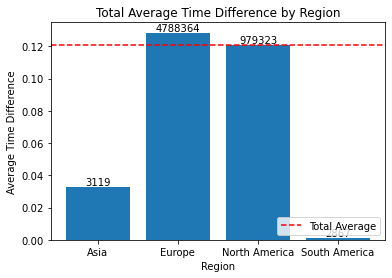

In [308]:
import matplotlib.pyplot as plt

# Define the data
regions = ['Asia', 'Europe', 'North America', 'South America']
avg_time_diff = [0.032764, 0.128411, 0.120871, 0.000851]
total_avg_time_diff = 0.12088
region_count = [3119, 4788364, 979323, 2867]  # Count of occurrences in each region

# Create the bar chart
plt.bar(regions, avg_time_diff)
plt.axhline(total_avg_time_diff, color='r', linestyle='--', label='Total Average')

# Add data labels to the bars
for i in range(len(regions)):
    plt.text(i, avg_time_diff[i], str(region_count[i]), ha='center', va='bottom')

# Add labels and title
plt.xlabel('Region')
plt.ylabel('Average Time Difference')
plt.title('Total Average Time Difference by Region')
plt.legend()

# Display the chart
plt.show()

In [94]:
merged_df.groupby('Region').size()

Region
Asia                3119
Europe           4788374
North America     979323
South America       2867
dtype: int64

In [96]:
netherlands_data = merged_df[merged_df['Country'] == 'Netherlands']
netherlands_data

,Organization,timestamp_resp,timestamp_req,Req_Date,Time_Diff,sourceIp,City,Country,City_Country,Region
434508,null,2022-12-01 14:37:47.570253,2022-12-01 14:37:47.567,2022-12-01,0.003253,89.149.202.136,Amsterdam,Netherlands,"Amsterdam, NL",Europe
585099,montepio2.0pro-org,2022-12-01 19:54:06.137895,2022-12-01 19:54:02.475,2022-12-01,3.662895,13.80.102.19,Amsterdam,Netherlands,"Amsterdam, NL",Europe
585215,montepio2.0pro-org,2022-12-01 19:54:24.179290,2022-12-01 19:54:19.032,2022-12-01,5.147290,13.80.102.19,Amsterdam,Netherlands,"Amsterdam, NL",Europe
779264,montepio2.0pro-org,2022-12-02 09:54:39.929377,2022-12-02 09:54:35.099,2022-12-02,4.830377,13.80.102.19,Amsterdam,Netherlands,"Amsterdam, NL",Europe
797238,montepio2.0qua-org,2022-12-02 10:28:45.613740,2022-12-02 10:28:41.425,2022-12-02,4.188740,13.95.71.94,Amsterdam,Netherlands,"Amsterdam, NL",Europe
...,...,...,...,...,...,...,...,...,...,...
6083267,montepio2.0pro-org,2022-12-10 16:56:49.246239,2022-12-10 16:56:45.409,2022-12-10,3.837239,13.80.102.19,Amsterdam,Netherlands,"Amsterdam, NL",Europe
6083281,montepio2.0pro-org,2022-12-10 16:56:52.994700,2022-12-10 16:56:49.314,2022-12-10,3.680700,13.80.102.19,Amsterdam,Netherlands,"Amsterdam, NL",Europe
6083660,montepio2.0pro-org,2022-12-10 16:58:00.857064,2022-12-10 16:57:57.251,2022-12-10,3.606064,13.80.102.19,Amsterdam,Netherlands,"Amsterdam, NL",Europe
6083670,montepio2.0pro-org,2022-12-10 16:57:57.191129,2022-12-10 16:57:53.479,2022-12-10,3.712129,13.80.102.19,Amsterdam,Netherlands,"Amsterdam, NL",Europe


C:\Users\leube\AppData\Local\Temp\ipykernel_21532\1274432164.py:24: UserWarning:

FixedFormatter should only be used together with FixedLocator



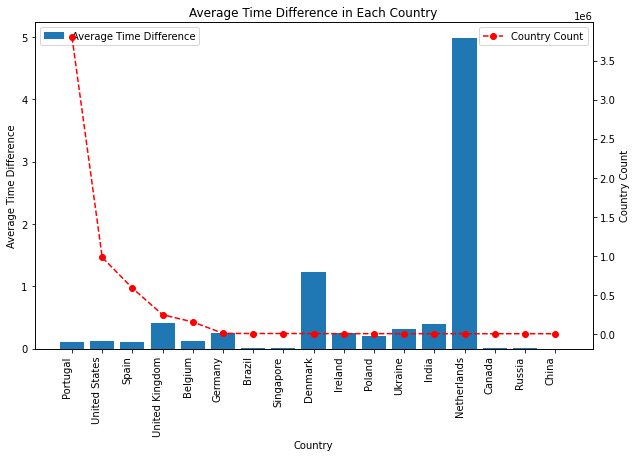

In [367]:
import matplotlib.pyplot as plt

# Data for countries and their average time difference
countries = ['Belgium', 'Brazil', 'Canada', 'China', 'Denmark', 'Germany', 'India', 'Ireland', 'Netherlands', 'Poland', 'Portugal', 'Russia', 'Singapore', 'Spain', 'Ukraine', 'United Kingdom', 'United States']
average_time_diff = [0.126954, 0.000851, 0.001041, 0.000589, 1.222732, 0.246259, 0.394306, 0.256657, 4.982575, 0.197768, 0.112913, 0.000891, 0.000849, 0.109708, 0.313255, 0.403449, 0.120871]
country_counts = [151441, 2867, 3, 1, 1805, 4778, 253, 985, 75, 885, 3800656, 2, 2865, 584125, 533, 243079, 979320]
# Create the bar chart
sorted_data = sorted(zip(country_counts, average_time_diff, countries), reverse=True)
country_counts, average_time_diff, countries = zip(*sorted_data)

# Create the bar chart
fig, ax1 = plt.subplots()
ax1.bar(countries, average_time_diff)
ax1.set_xlabel('Country')
ax1.set_ylabel('Average Time Difference')
ax1.set_title('Average Time Difference in Each Country')

# Create a second y-axis for country counts
ax2 = ax1.twinx()
ax2.plot(countries, country_counts, color='r', marker='o', linestyle='--')
ax2.set_ylabel('Country Count')

# Rotate the x-axis labels for better visibility
ax1.set_xticklabels(countries, rotation=90, ha='right')

# Adjust the figure size to prevent overlapping of labels
fig.set_size_inches(10, 6)

# Add legends
ax1.legend(['Average Time Difference'], loc='upper left')
ax2.legend(['Country Count'], loc='upper right')
ax2.set_ylabel('Country Count')

# Display the chart
plt.show()



In [114]:
import matplotlib.pyplot as plt

time_diff = merged_df['Time_Diff']


pd.options.display.float_format = '{:.6f}'.format
time_diff.describe()

count   6137653.000000
mean          0.120882
std           0.401960
min           0.000248
25%           0.079333
50%           0.096113
75%           0.111105
max         132.568077
Name: Time_Diff, dtype: float64

In [108]:
standardized_values = (time_diff - time_diff.mean()) / time_diff.std()

# Calculate the average value
average = time_diff.mean()

# Find the value that is 90 percent higher than the average
value_90_percent_higher = average + (0.9 * average)

# Display the results
print("Standardized Values:")
print(standardized_values)
print("\nAverage: {:.6f}".format(average))
print("Value that is 90 percent higher than the average: {:.6f}".format(value_90_percent_higher))

Standardized Values:
0         -0.083421
1         -0.043083
2         -0.051343
3         -0.064458
4         -0.083677
             ...   
6194980   -0.022278
6194981   -0.046618
6194982   -0.054808
6194983   -0.061503
6194984   -0.044029
Name: Time_Diff, Length: 6137663, dtype: float64

Average: 0.120882
Value that is 90 percent higher than the average: 0.229675


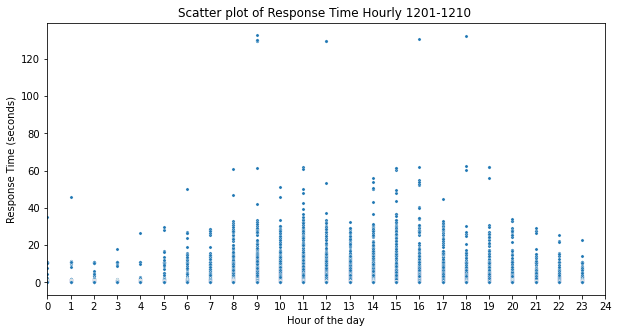

In [115]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=merged_df['Hour'], y=merged_df['Time_Diff'], s=10)
plt.title('Scatter plot of Response Time Hourly 1201-1210 ')
plt.xlim(0, 24)
plt.xticks(range(0, 25))
plt.xlabel('Hour of the day')
plt.ylabel('Response Time (seconds)')
plt.show()


In [116]:
merged_df["High_response_time"] = merged_df["Time_Diff"].apply(lambda x: 1 if x > 0.2296 else 0)
merged_df

In [120]:
merged_df.groupby('High_response_time').count()
merged_df

,Organization,timestamp_resp,timestamp_req,Req_Date,Time_Diff,sourceIp,City,Country,City_Country,Region,Hour,High_response_time
0,6b1faf26-cb89-4cc0-a158-d494e1c664cd,2022-11-30 23:59:22.446350,2022-11-30 23:59:22.359,2022-11-30,0.087350,62.48.164.172,Figueira da Foz Municipality,Portugal,"Figueira da Foz Municipality, PT",Europe,23.000000,0
1,6b1faf26-cb89-4cc0-a158-d494e1c664cd,2022-11-30 23:59:23.166564,2022-11-30 23:59:23.063,2022-11-30,0.103564,62.48.164.172,Figueira da Foz Municipality,Portugal,"Figueira da Foz Municipality, PT",Europe,23.000000,0
2,09340114-ae3e-452e-9c7a-191f52d34da7,2022-11-30 23:59:24.484244,2022-11-30 23:59:24.384,2022-11-30,0.100244,193.36.190.25,Lisbon,Portugal,"Lisbon, PT",Europe,23.000000,0
3,6b1faf26-cb89-4cc0-a158-d494e1c664cd,2022-11-30 23:59:25.030972,2022-11-30 23:59:24.936,2022-11-30,0.094972,62.48.164.172,Figueira da Foz Municipality,Portugal,"Figueira da Foz Municipality, PT",Europe,23.000000,0
4,6b1faf26-cb89-4cc0-a158-d494e1c664cd,2022-11-30 23:59:25.164247,2022-11-30 23:59:25.077,2022-11-30,0.087247,62.48.164.172,Figueira da Foz Municipality,Portugal,"Figueira da Foz Municipality, PT",Europe,23.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6194980,09340114-ae3e-452e-9c7a-191f52d34da7,2022-12-10 23:59:51.753927,2022-12-10 23:59:51.642,2022-12-10,0.111927,193.36.190.25,Lisbon,Portugal,"Lisbon, PT",Europe,23.000000,0
6194981,09340114-ae3e-452e-9c7a-191f52d34da7,2022-12-10 23:59:50.884143,2022-12-10 23:59:50.782,2022-12-10,0.102143,193.36.190.25,Lisbon,Portugal,"Lisbon, PT",Europe,23.000000,0
6194982,09340114-ae3e-452e-9c7a-191f52d34da7,2022-12-10 23:59:51.157851,2022-12-10 23:59:51.059,2022-12-10,0.098851,193.36.190.25,Lisbon,Portugal,"Lisbon, PT",Europe,23.000000,0
6194983,09340114-ae3e-452e-9c7a-191f52d34da7,2022-12-10 23:59:52.035160,2022-12-10 23:59:51.939,2022-12-10,0.096160,193.36.190.25,Lisbon,Portugal,"Lisbon, PT",Europe,23.000000,0


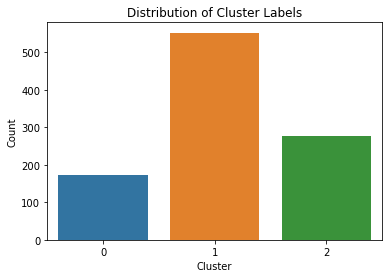

In [137]:
# Plot the distribution of cluster labels
sns.countplot(data=sample_data, x='Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Distribution of Cluster Labels')
plt.show()

In [302]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the dataset
data = joined_df.sample(n=200000, replace=False, random_state=42)

# Select the predictor variables
X = data[['httpMethod','Country', 'Region','Hour','Organization','City']]

# Encode categorical variables
X_encoded = pd.get_dummies(X)

# Select the target variable
y = data['High_response_time']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=50)

# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the accuracy of the classifier
from sklearn.metrics import confusion_matrix

# Assuming you already have the y_test and y_pred variables from your classifier

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[55549   587]
 [ 2178  1686]]
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98     56136
         1.0       0.74      0.44      0.55      3864

    accuracy                           0.95     60000
   macro avg       0.85      0.71      0.76     60000
weighted avg       0.95      0.95      0.95     60000



In [301]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the dataset
data = joined_df.sample(n=100000, replace=False, random_state=42)

# Select the predictor variables
X = data[['httpMethod','Country', 'Region','Hour','Organization','City']]

# Encode categorical variables
X_encoded = pd.get_dummies(X)

# Select the target variable
y = data['High_response_time']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=10000)

# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the accuracy of the classifier
from sklearn.metrics import confusion_matrix

# Assuming you already have the y_test and y_pred variables from your classifier

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[27774   322]
 [ 1102   802]]
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98     28096
         1.0       0.71      0.42      0.53      1904

    accuracy                           0.95     30000
   macro avg       0.84      0.70      0.75     30000
weighted avg       0.95      0.95      0.95     30000



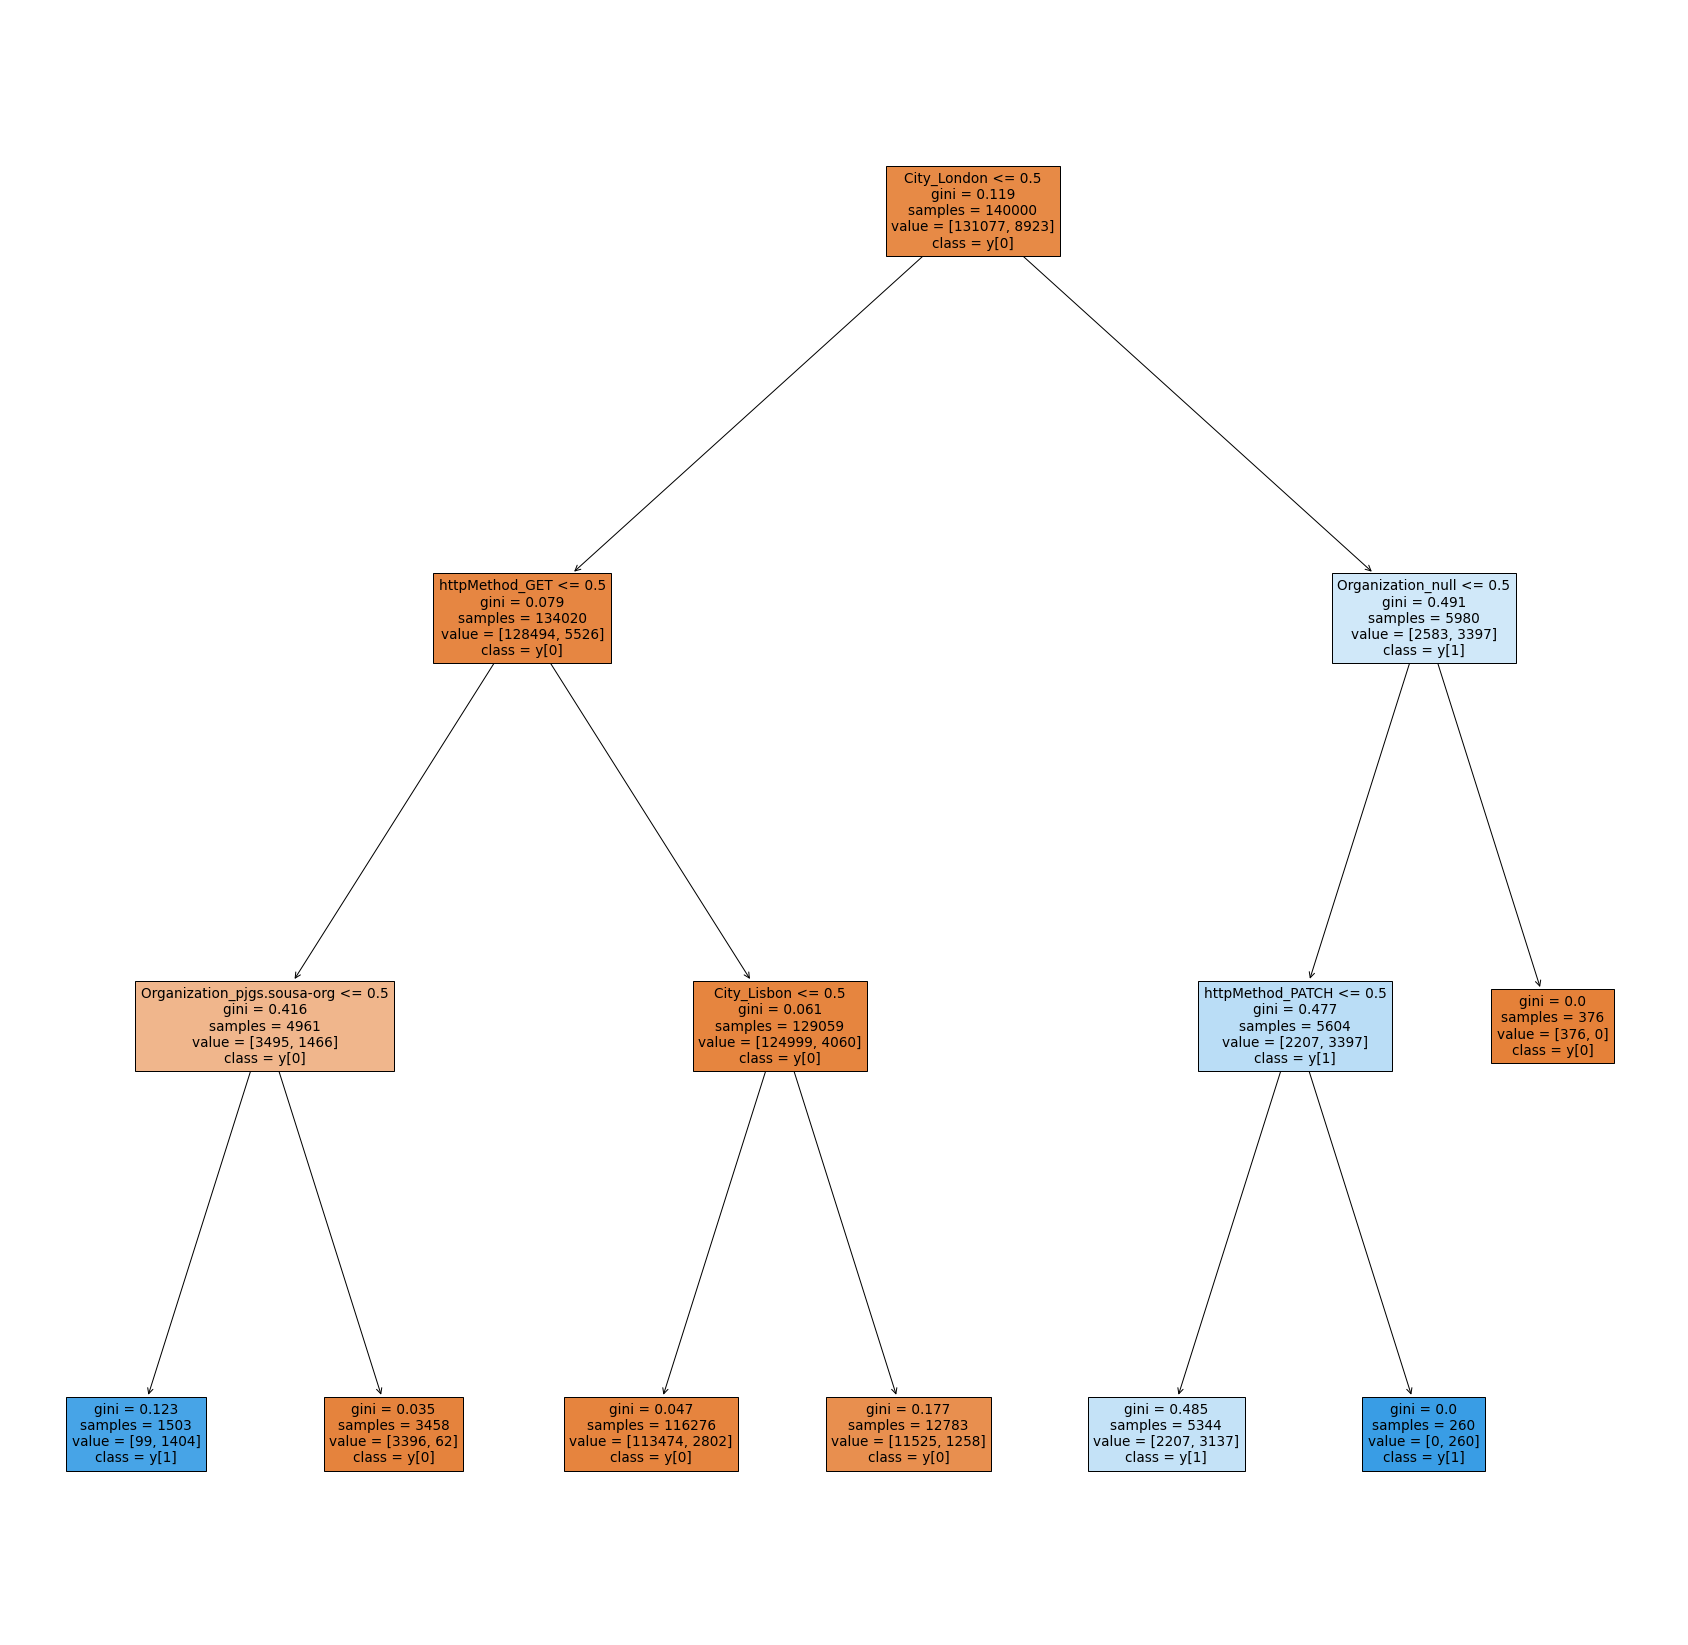

In [303]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Create the decision tree classifier
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=1000)

# Fit the classifier on the training data
clf_gini.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(30, 30))
tree.plot_tree(clf_gini.fit(X_train, y_train), feature_names=X_train.columns, filled=True, class_names=True)
plt.show()

In [180]:
df1 = pd.read_csv('1201.csv', usecols=['httpMethod'])
df2 = pd.read_csv('1202.csv', usecols=['httpMethod'])
df3 = pd.read_csv('1203.csv', usecols=['httpMethod'])
df4 = pd.read_csv('1204.csv', usecols=['httpMethod'])
df5 = pd.read_csv('1205.csv', usecols=['httpMethod'])
df6 = pd.read_csv('1206.csv', usecols=['httpMethod'])
df7 = pd.read_csv('1207.csv', usecols=['httpMethod'])
df8 = pd.read_csv('1208.csv', usecols=['httpMethod'])
df9 = pd.read_csv('1209.csv', usecols=['httpMethod'])
df10 = pd.read_csv('1210.csv', usecols=['httpMethod'])
df11=pd.read_csv('01-10Organization.csv')
# concatenate the desired columns
result123 = pd.concat([df1['httpMethod'], df2['httpMethod'], df3['httpMethod'],df4['httpMethod'],df5['httpMethod'],df6['httpMethod'],df7['httpMethod'],df8['httpMethod'],df9['httpMethod'],df10['httpMethod']])
result123

0          \"httpMethod\": \"GET\"
1          \"httpMethod\": \"GET\"
2          \"httpMethod\": \"GET\"
3          \"httpMethod\": \"GET\"
4          \"httpMethod\": \"GET\"
                    ...           
324148     \"httpMethod\": \"GET\"
324149     \"httpMethod\": \"GET\"
324150     \"httpMethod\": \"GET\"
324151     \"httpMethod\": \"GET\"
324152     \"httpMethod\": \"GET\"
Name: httpMethod, Length: 6194985, dtype: object

In [187]:
result123 = result123.reset_index(drop=True)
df11 = df11.reset_index(drop=True)
result1234 = pd.concat([result123, df11], axis=1)
result1234

,httpMethod,Organization
0,"\""httpMethod\"": \""GET\""","\""organization\"": \""6b1faf26-cb89-4cc0-a158-d..."
1,"\""httpMethod\"": \""GET\""","\""organization\"": \""6b1faf26-cb89-4cc0-a158-d..."
2,"\""httpMethod\"": \""GET\""","\""organization\"": \""09340114-ae3e-452e-9c7a-1..."
3,"\""httpMethod\"": \""GET\""","\""organization\"": \""6b1faf26-cb89-4cc0-a158-d..."
4,"\""httpMethod\"": \""GET\""","\""organization\"": \""6b1faf26-cb89-4cc0-a158-d..."
...,...,...
6194980,"\""httpMethod\"": \""GET\""","\""organization\"": \""09340114-ae3e-452e-9c7a-1..."
6194981,"\""httpMethod\"": \""GET\""","\""organization\"": \""09340114-ae3e-452e-9c7a-1..."
6194982,"\""httpMethod\"": \""GET\""","\""organization\"": \""09340114-ae3e-452e-9c7a-1..."
6194983,"\""httpMethod\"": \""GET\""","\""organization\"": \""09340114-ae3e-452e-9c7a-1..."


In [193]:
result1234['httpMethod'] = result1234['httpMethod'].str.split(':').str[-1].str.strip().str.replace('\"', '')
result1234['httpMethod'] =result1234['httpMethod'].str.strip('\\')
result1234['Organization'] = result1234['Organization'].str.split(':').str[-1].str.strip().str.replace('\"', '')
result1234['Organization'] =result1234['Organization'].str.strip('\\')
result1234

,httpMethod,Organization
0,GET,6b1faf26-cb89-4cc0-a158-d494e1c664cd
1,GET,6b1faf26-cb89-4cc0-a158-d494e1c664cd
2,GET,09340114-ae3e-452e-9c7a-191f52d34da7
3,GET,6b1faf26-cb89-4cc0-a158-d494e1c664cd
4,GET,6b1faf26-cb89-4cc0-a158-d494e1c664cd
...,...,...
6194980,GET,09340114-ae3e-452e-9c7a-191f52d34da7
6194981,GET,09340114-ae3e-452e-9c7a-191f52d34da7
6194982,GET,09340114-ae3e-452e-9c7a-191f52d34da7
6194983,GET,09340114-ae3e-452e-9c7a-191f52d34da7


In [227]:
merged_df2 = merged_df.sample(n=10000, replace=True, random_state=42)
result12345 = result1234.sample(n=10000, replace=True, random_state=42)
merged_df2

,Organization,timestamp_resp,timestamp_req,Req_Date,Time_Diff,sourceIp,City,Country,Region,Hour,High_response_time,Cluster
1795775,9360f6cc-a025-47db-bbf2-b4046f27f8a6,2022-12-03 13:52:51.541489,2022-12-03 13:52:51.452,2022-12-03,0.089489,194.79.66.193,Carnaxide,Portugal,Europe,13.000000,0,0
4568688,09340114-ae3e-452e-9c7a-191f52d34da7,2022-12-07 05:18:27.127818,2022-12-07 05:18:27.011,2022-12-07,0.116818,193.36.190.25,Lisbon,Portugal,Europe,5.000000,0,0
5239648,lara.andrade-org,2022-12-08 03:40:03.739303,2022-12-08 03:40:03.737,2022-12-08,0.002303,62.48.164.170,Figueira da Foz Municipality,Portugal,Europe,3.000000,0,0
2363728,09340114-ae3e-452e-9c7a-191f52d34da7,2022-12-04 05:12:26.826831,2022-12-04 05:12:26.735,2022-12-04,0.091831,193.36.190.25,Lisbon,Portugal,Europe,5.000000,0,0
1667899,6b1faf26-cb89-4cc0-a158-d494e1c664cd,2022-12-03 10:53:22.098081,2022-12-03 10:53:22.012,2022-12-03,0.086081,62.48.164.172,Figueira da Foz Municipality,Portugal,Europe,10.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2516174,9360f6cc-a025-47db-bbf2-b4046f27f8a6,2022-12-04 09:51:45.379260,2022-12-04 09:51:45.280,2022-12-04,0.099260,194.79.66.193,Carnaxide,Portugal,Europe,9.000000,0,0
5866071,lara.andrade-org,2022-12-09 23:21:08.877255,2022-12-09 23:21:08.875,2022-12-09,0.002255,62.48.164.170,Figueira da Foz Municipality,Portugal,Europe,23.000000,0,0
4787850,lara.andrade-org,2022-12-07 14:05:31.668323,2022-12-07 14:05:31.667,2022-12-07,0.001323,62.48.164.170,Figueira da Foz Municipality,Portugal,Europe,14.000000,0,0
2913177,f00716b5-e120-4699-b827-791d6e2a2565,2022-12-04 18:57:55.974353,2022-12-04 18:57:55.877,2022-12-04,0.097353,3.224.122.159,Ashburn,United States,North America,18.000000,0,0


In [230]:
import numpy as np

# Assuming your array is called 'my_array'
result1234['Organization'] = result1234['Organization'].astype(str)
result12345

,httpMethod,Organization
1692743,GET,6b1faf26-cb89-4cc0-a158-d494e1c664cd
4304572,GET,6b1faf26-cb89-4cc0-a158-d494e1c664cd
4926484,GET,9360f6cc-a025-47db-bbf2-b4046f27f8a6
2234489,GET,6b1faf26-cb89-4cc0-a158-d494e1c664cd
1570006,GET,bcd5ea8f-0fea-41cd-9bab-16582ca49666
...,...,...
858811,GET,f00716b5-e120-4699-b827-791d6e2a2565
4064337,GET,9360f6cc-a025-47db-bbf2-b4046f27f8a6
5358954,GET,6b1faf26-cb89-4cc0-a158-d494e1c664cd
2664649,GET,bcd5ea8f-0fea-41cd-9bab-16582ca49666


In [277]:
joined_df = pd.concat([result1234, merged_df], axis=1)
joined_df

,httpMethod,Organization,Organization,timestamp_resp,timestamp_req,Req_Date,Time_Diff,sourceIp,City,Country,Region,Hour,High_response_time,Cluster
0,GET,6b1faf26-cb89-4cc0-a158-d494e1c664cd,6b1faf26-cb89-4cc0-a158-d494e1c664cd,2022-11-30 23:59:22.446350,2022-11-30 23:59:22.359,2022-11-30,0.087350,62.48.164.172,Figueira da Foz Municipality,Portugal,Europe,23.000000,0.000000,0.000000
1,GET,6b1faf26-cb89-4cc0-a158-d494e1c664cd,6b1faf26-cb89-4cc0-a158-d494e1c664cd,2022-11-30 23:59:23.166564,2022-11-30 23:59:23.063,2022-11-30,0.103564,62.48.164.172,Figueira da Foz Municipality,Portugal,Europe,23.000000,0.000000,0.000000
2,GET,09340114-ae3e-452e-9c7a-191f52d34da7,09340114-ae3e-452e-9c7a-191f52d34da7,2022-11-30 23:59:24.484244,2022-11-30 23:59:24.384,2022-11-30,0.100244,193.36.190.25,Lisbon,Portugal,Europe,23.000000,0.000000,0.000000
3,GET,6b1faf26-cb89-4cc0-a158-d494e1c664cd,6b1faf26-cb89-4cc0-a158-d494e1c664cd,2022-11-30 23:59:25.030972,2022-11-30 23:59:24.936,2022-11-30,0.094972,62.48.164.172,Figueira da Foz Municipality,Portugal,Europe,23.000000,0.000000,0.000000
4,GET,6b1faf26-cb89-4cc0-a158-d494e1c664cd,6b1faf26-cb89-4cc0-a158-d494e1c664cd,2022-11-30 23:59:25.164247,2022-11-30 23:59:25.077,2022-11-30,0.087247,62.48.164.172,Figueira da Foz Municipality,Portugal,Europe,23.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6194980,GET,09340114-ae3e-452e-9c7a-191f52d34da7,09340114-ae3e-452e-9c7a-191f52d34da7,2022-12-10 23:59:51.753927,2022-12-10 23:59:51.642,2022-12-10,0.111927,193.36.190.25,Lisbon,Portugal,Europe,23.000000,0.000000,0.000000
6194981,GET,09340114-ae3e-452e-9c7a-191f52d34da7,09340114-ae3e-452e-9c7a-191f52d34da7,2022-12-10 23:59:50.884143,2022-12-10 23:59:50.782,2022-12-10,0.102143,193.36.190.25,Lisbon,Portugal,Europe,23.000000,0.000000,0.000000
6194982,GET,09340114-ae3e-452e-9c7a-191f52d34da7,09340114-ae3e-452e-9c7a-191f52d34da7,2022-12-10 23:59:51.157851,2022-12-10 23:59:51.059,2022-12-10,0.098851,193.36.190.25,Lisbon,Portugal,Europe,23.000000,0.000000,0.000000
6194983,GET,09340114-ae3e-452e-9c7a-191f52d34da7,09340114-ae3e-452e-9c7a-191f52d34da7,2022-12-10 23:59:52.035160,2022-12-10 23:59:51.939,2022-12-10,0.096160,193.36.190.25,Lisbon,Portugal,Europe,23.000000,0.000000,0.000000


In [286]:
joined_df = joined_df.loc[:,~joined_df.columns.duplicated(keep='first')]


In [369]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
rf_model1 = RandomForestClassifier(random_state=10000,max_depth=4)

# Train the classifier
rf_model1.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model1.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Print the classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.9371666666666667
Confusion Matrix:
[[56134     2]
 [ 3768    96]]
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97     56136
         1.0       0.98      0.02      0.05      3864

    accuracy                           0.94     60000
   macro avg       0.96      0.51      0.51     60000
weighted avg       0.94      0.94      0.91     60000



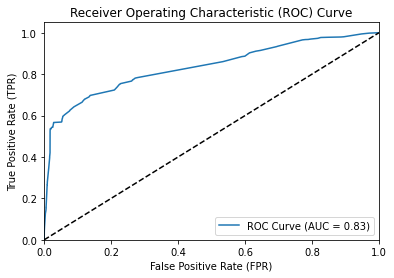

In [372]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
y_score = rf_model1.predict_proba(X_test)[:, 1]

# Calculate the false positive rate (FPR), true positive rate (TPR), and threshold values
fpr, tpr, thresholds = roc_curve(y_test, y_score)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random classification
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()







